In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
input_path_questions="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Posts\\FinalCsvFiles\\QuestionsPosts_2017_2020.csv"
input_path_answers="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Posts\\FinalCsvFiles\\AnswersPosts_2017_2020.csv"

In [2]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [3]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    
    result = adfuller(timeseries)
    p_value=result[1]
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

In [4]:
import scipy.stats as stats
def is_normal_shapiro(data):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [5]:
data_q=pd.read_csv(input_path_questions,names=["RowId","CreateDate","Score","ViewCount","LastEditDate","LastActivityDate",
                                               "AnswerCount","CommentCount","FavoritCount","AcceptedAnswerId"],dtype=str)
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId
0,41412454,2017-01-01T00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN
1,41412456,2017-01-01T00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707
2,41412462,2017-01-01T00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN
3,41412463,2017-01-01T00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502
4,41412468,2017-01-01T00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618


In [6]:
data_a=pd.read_csv(input_path_answers,names=["RowId","CreateDate","Score","ViewCount","LastEditDate",
                                             "LastActivityDate","AnswerCount","CommentCount","FavoritCount","ParentId"],dtype=str)
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId
0,41412453,2017-01-01T00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359
1,41412455,2017-01-01T00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413
2,41412458,2017-01-01T00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344
3,41412459,2017-01-01T00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895
4,41412461,2017-01-01T00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388


In [7]:
len(data_q)

7945781

In [8]:
len(data_a)

10177940

In [9]:
data_q["CreateDate"] = pd.to_datetime(data_q["CreateDate"])

In [10]:
data_a["CreateDate"] = pd.to_datetime(data_a["CreateDate"])

In [11]:
data_q['day_date'] = data_q['CreateDate'].dt.date
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,day_date
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017-01-01
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017-01-01
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017-01-01
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017-01-01
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017-01-01


In [12]:
data_a['day_date'] = data_a['CreateDate'].dt.date
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,day_date
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017-01-01
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017-01-01
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017-01-01
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017-01-01
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017-01-01


In [13]:
ques_daily=pd.DataFrame(data_q[["RowId", "day_date"]])
ques_daily.head()

,RowId,day_date
0,41412454,2017-01-01
1,41412456,2017-01-01
2,41412462,2017-01-01
3,41412463,2017-01-01
4,41412468,2017-01-01


In [14]:
ans_daily=pd.DataFrame(data_a[["RowId", "day_date"]])
ans_daily.head()

,RowId,day_date
0,41412453,2017-01-01
1,41412455,2017-01-01
2,41412458,2017-01-01
3,41412459,2017-01-01
4,41412461,2017-01-01


In [15]:
ques_daily_grp=ques_daily.groupby(by=['day_date']).size().reset_index(name='counts')
ques_daily_grp.head()

,day_date,counts
0,2017-01-01,2376
1,2017-01-02,4657
2,2017-01-03,6175
3,2017-01-04,6807
4,2017-01-05,7043


In [16]:
ans_daily_grp=ans_daily.groupby(by=['day_date']).size().reset_index(name='counts')
ans_daily_grp.head()

,day_date,counts
0,2017-01-01,3320
1,2017-01-02,6733
2,2017-01-03,9003
3,2017-01-04,9545
4,2017-01-05,9763


In [17]:
ques_daily_grp['day_date']=pd.to_datetime(ques_daily_grp["day_date"])

In [18]:
ans_daily_grp['day_date']=pd.to_datetime(ans_daily_grp["day_date"])

Text(0, 0.5, '#Questions')

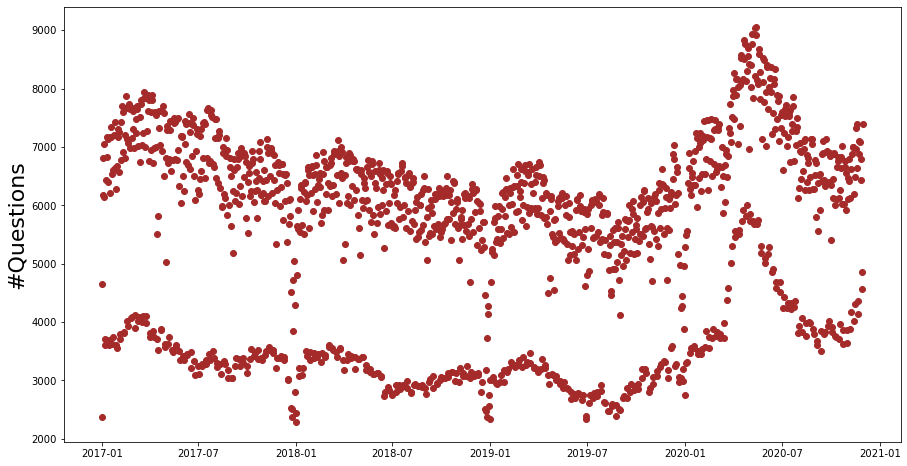

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(ques_daily_grp['day_date'],ques_daily_grp['counts'],color='brown')
plt.ylabel('#Questions',fontsize=22)

In [20]:
ques_daily_grp[ques_daily_grp['counts']<4000]

,day_date,counts
0,2017-01-01,2376
6,2017-01-07,3704
7,2017-01-08,3611
13,2017-01-14,3608
14,2017-01-15,3690
...,...,...
1392,2020-10-24,3631
1393,2020-10-25,3855
1399,2020-10-31,3633
1400,2020-11-01,3864


Text(0, 0.5, '#Answers')

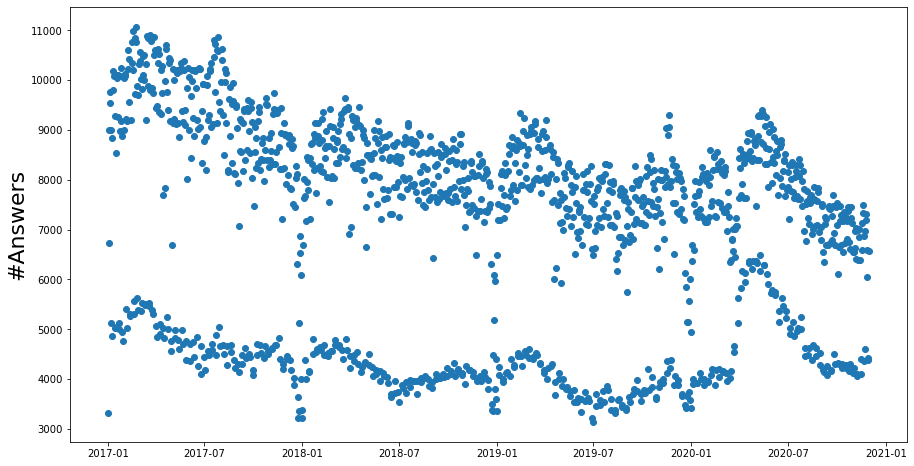

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(ans_daily_grp['day_date'],ans_daily_grp['counts'])
plt.ylabel('#Answers',fontsize=22)

In [275]:
daily_ques_by_ans=pd.merge(ques_daily_grp,ans_daily_grp,how='inner', left_on= ['day_date'],right_on= ['day_date'])
len(daily_ques_by_ans)

1430

In [270]:
len(ques_daily_grp)

1430

In [276]:
daily_ques_by_ans.head()

,day_date,counts_x,count_delta_x,counts_y,count_delta_y
0,2017-01-01,2376,NaN,3320,NaN
1,2017-01-02,4657,2281.0,6733,3413.0
2,2017-01-03,6175,1518.0,9003,2270.0
3,2017-01-04,6807,632.0,9545,542.0
4,2017-01-05,7043,236.0,9763,218.0


In [278]:
daily_ques_by_ans = daily_ques_by_ans.rename(columns={'counts_x': 'num_ques', 'counts_y': 'num_ans'})
daily_ques_by_ans.head()

,day_date,num_ques,count_delta_x,num_ans,count_delta_y
0,2017-01-01,2376,NaN,3320,NaN
1,2017-01-02,4657,2281.0,6733,3413.0
2,2017-01-03,6175,1518.0,9003,2270.0
3,2017-01-04,6807,632.0,9545,542.0
4,2017-01-05,7043,236.0,9763,218.0


In [279]:
daily_ques_by_ans['ques_by_ans']=daily_ques_by_ans['num_ques']/daily_ques_by_ans['num_ans']

In [280]:
daily_ques_by_ans.head()

,day_date,num_ques,count_delta_x,num_ans,count_delta_y,ques_by_ans
0,2017-01-01,2376,NaN,3320,NaN,0.715663
1,2017-01-02,4657,2281.0,6733,3413.0,0.691668
2,2017-01-03,6175,1518.0,9003,2270.0,0.685882
3,2017-01-04,6807,632.0,9545,542.0,0.713148
4,2017-01-05,7043,236.0,9763,218.0,0.721397


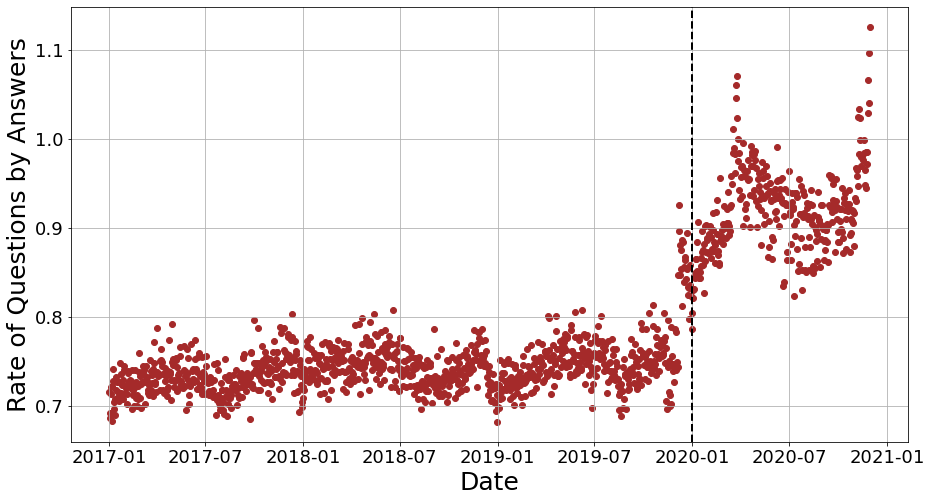

In [301]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(daily_ques_by_ans['day_date'],daily_ques_by_ans['ques_by_ans'],color='brown')
plt.ylabel('Rate of Questions by Answers',fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()
plt.xlabel('Date',fontsize=25)
ax.axvline(pd.to_datetime('2020-01'), color='black', linestyle='--', lw=2)
plt.savefig('figs/SO_QuesyionByAnswersDailyScatterPlot.pdf',bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(15,8))
# plt.scatter(daily_ques_by_ans['day_date'],daily_ques_by_ans['ques_by_ans'])
# plt.ylabel('rate',fontsize=22)

In [282]:
adf_test(daily_ques_by_ans['ques_by_ans'])

Results of Dickey-Fuller Test:
ADF Statistic: 1.059660
p-value: 0.994857
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: The series is not stationary


In [283]:
kpss_test(daily_ques_by_ans['ques_by_ans'])

KPSS Statistic: 3.8605977189416043
p-value: 0.01
num lags: 24
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [284]:
is_normal_shapiro(daily_ques_by_ans['ques_by_ans'])

Statistics=0.795, p=0.000
Sample does not look Gaussian (reject H0)


In [319]:
daily_ques_by_ans_noOutli=daily_ques_by_ans[(daily_ques_by_ans['ques_by_ans']<=1)]
len(daily_ques_by_ans_noOutli) ##does not have fisrt day, we filtered it

1417

In [321]:
daily_ques_by_ans_noOutli_17_19=daily_ques_by_ans_noOutli[daily_ques_by_ans_noOutli['day_date']<'2020-01-01']
len(daily_ques_by_ans_noOutli_17_19)

1095

In [322]:
daily_ques_by_ans_noOutli_20=daily_ques_by_ans_noOutli[daily_ques_by_ans_noOutli['day_date']>='2020-01-01']
len(daily_ques_by_ans_noOutli_20)

322

In [326]:
stat, p = stats.mannwhitneyu(daily_ques_by_ans_noOutli_17_19['ques_by_ans'], daily_ques_by_ans_noOutli_20['ques_by_ans'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=945.000, p=0.000
Different distribution (reject H0)


In [323]:
adf_test(daily_ques_by_ans_noOutli_17_19['ques_by_ans'])

Results of Dickey-Fuller Test:
ADF Statistic: -3.355785
p-value: 0.012562
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Result: The series is stationary


In [291]:
kpss_test(daily_ques_by_ans_17_19['ques_by_ans'])

KPSS Statistic: 1.2379063452940027
p-value: 0.01
num lags: 22
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [292]:
adf_test(daily_ques_by_ans_20['ques_by_ans'])

Results of Dickey-Fuller Test:
ADF Statistic: -0.621495
p-value: 0.866051
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Result: The series is not stationary


In [293]:
kpss_test(daily_ques_by_ans_20['ques_by_ans'])

KPSS Statistic: 0.32805606204351384
p-value: 0.1
num lags: 17
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Text(0, 0.5, 'rate')

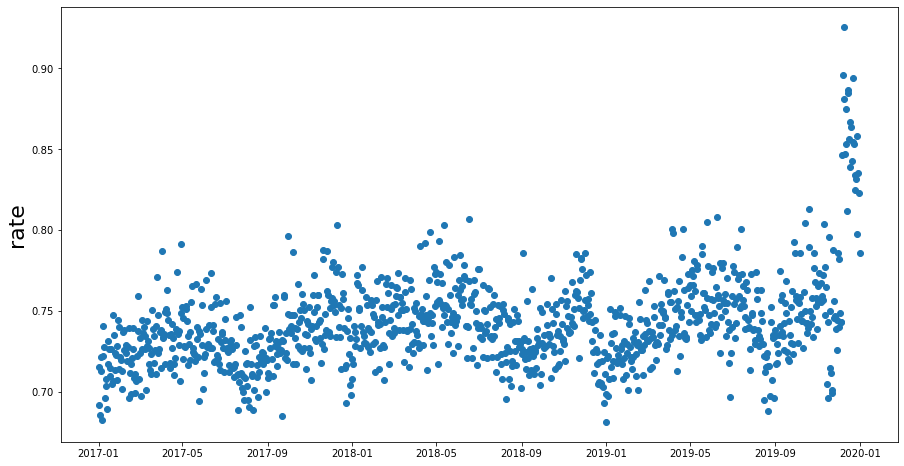

In [294]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(daily_ques_by_ans_17_19['day_date'],daily_ques_by_ans_17_19['ques_by_ans'])
plt.ylabel('rate',fontsize=22)

Text(0, 0.5, 'rate')

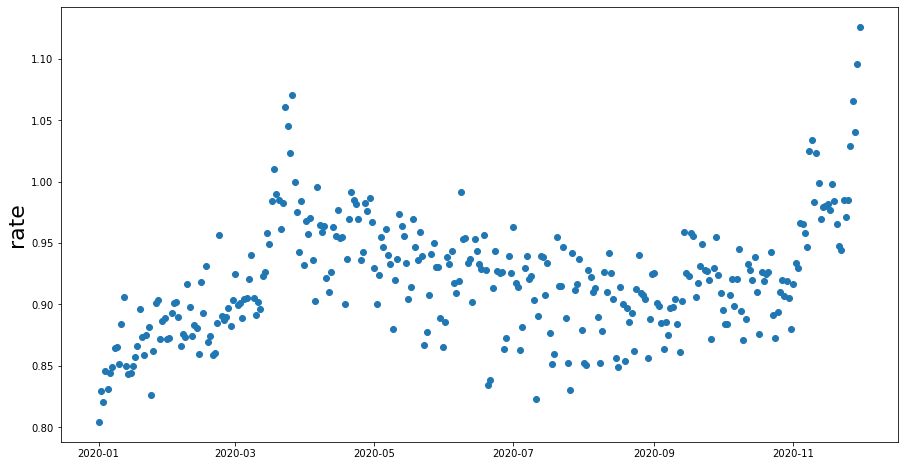

In [295]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(daily_ques_by_ans_20['day_date'],daily_ques_by_ans_20['ques_by_ans'])
plt.ylabel('rate',fontsize=22)

In [325]:
daily_ques_by_ans_noOutli_20['ques_by_ans'].mean()

0.9150828246274895

In [298]:
daily_ques_by_ans_noOutli_17_19['ques_by_ans'].mean()

0.7423199981278125

In [327]:
daily_ques_by_ans_noOutli_17=daily_ques_by_ans_noOutli[(daily_ques_by_ans_noOutli['day_date']>='2017-01-01')
                                                           & (daily_ques_by_ans_noOutli['day_date']<'2018-01-01')]
len(daily_ques_by_ans_noOutli_17)

365

In [328]:
daily_ques_by_ans_noOutli_18=daily_ques_by_ans_noOutli[(daily_ques_by_ans_noOutli['day_date']>='2018-01-01')
                                                           & (daily_ques_by_ans_noOutli['day_date']<'2019-01-01')]
len(daily_ques_by_ans_noOutli_18)

365

In [329]:
daily_ques_by_ans_noOutli_19=daily_ques_by_ans_noOutli[(daily_ques_by_ans_noOutli['day_date']>='2019-01-01')
                                                           & (daily_ques_by_ans_noOutli['day_date']<'2020-01-01')]
len(daily_ques_by_ans_noOutli_19)

365

In [330]:
daily_ques_by_ans_noOutli_17['ques_by_ans'].mean()

0.7312710527824495

In [331]:
daily_ques_by_ans_noOutli_18['ques_by_ans'].mean()

0.7427881297148079

In [332]:
daily_ques_by_ans_noOutli_19['ques_by_ans'].mean()

0.7529008118861803

In [333]:
daily_ques_by_ans_noOutli_20['ques_by_ans'].mean()

0.9150828246274895

In [334]:
daily_ques_by_ans_noOutli_17['ques_by_ans'].var()

0.0004161204651707592

In [335]:
daily_ques_by_ans_noOutli_18['ques_by_ans'].var()

0.00040540294934843344

In [336]:
daily_ques_by_ans_noOutli_19['ques_by_ans'].var()

0.0013157817336808993

In [337]:
daily_ques_by_ans_noOutli_20['ques_by_ans'].var()

0.0015950598999547373

0.9999999999999999
0.862091723958238


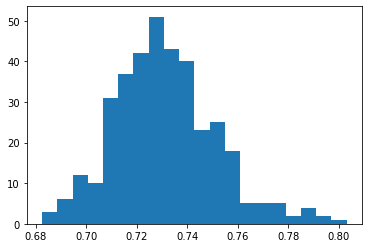

In [338]:
y, x, _=plt.hist(daily_ques_by_ans_noOutli_17['ques_by_ans'],bins=20)
probs_qa_17=y/len(daily_ques_by_ans_noOutli_17['ques_by_ans'])
print(probs_qa_17.sum())
print(stats.entropy(probs_qa_17,base=20)) 

1.0
0.8592313524221417


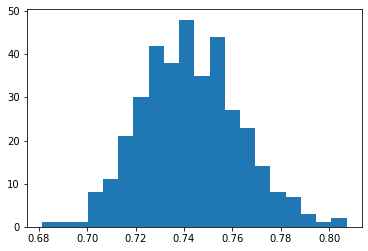

In [339]:
y, x, _=plt.hist(daily_ques_by_ans_noOutli_18['ques_by_ans'],bins=20)
probs_qa_18=y/len(daily_ques_by_ans_noOutli_18['ques_by_ans'])
print(probs_qa_18.sum())
print(stats.entropy(probs_qa_18,base=20)) 

0.9999999999999999
0.7706037623053477


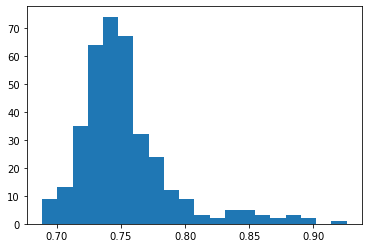

In [340]:
y, x, _=plt.hist(daily_ques_by_ans_noOutli_19['ques_by_ans'],bins=20)
probs_qa_19=y/len(daily_ques_by_ans_noOutli_19['ques_by_ans'])
print(probs_qa_19.sum())
print(stats.entropy(probs_qa_19,base=20)) 

1.0
0.9290067478551691


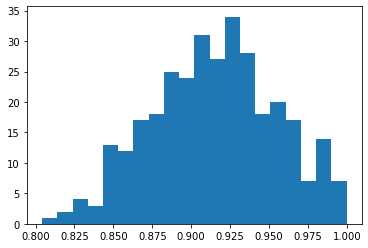

In [341]:
y, x, _=plt.hist(daily_ques_by_ans_noOutli_20['ques_by_ans'],bins=20)
probs_qa_20=y/len(daily_ques_by_ans_noOutli_20['ques_by_ans'])
print(probs_qa_20.sum())
print(stats.entropy(probs_qa_20,base=20)) 

In [342]:
stat, p = stats.mannwhitneyu(daily_ques_by_ans_noOutli_17['ques_by_ans'], daily_ques_by_ans_noOutli_20['ques_by_ans'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
Different distribution (reject H0)


In [343]:
stat, p = stats.mannwhitneyu(daily_ques_by_ans_noOutli_18['ques_by_ans'], daily_ques_by_ans_noOutli_20['ques_by_ans'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1.000, p=0.000
Different distribution (reject H0)


In [344]:
stat, p = stats.mannwhitneyu(daily_ques_by_ans_noOutli_19['ques_by_ans'], daily_ques_by_ans_noOutli_20['ques_by_ans'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=944.000, p=0.000
Different distribution (reject H0)


In [22]:
kpss_test(ques_daily_grp['counts'])

KPSS Statistic: 0.7998045467835719
p-value: 0.01
num lags: 24
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [23]:
adf_test(ques_daily_grp['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.384224
p-value: 0.146239
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: The series is not stationary


In [24]:
kpss_test(ans_daily_grp['counts'])

KPSS Statistic: 2.616981875148285
p-value: 0.01
num lags: 24
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [25]:
adf_test(ans_daily_grp['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.911937
p-value: 0.043977
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: The series is stationary


In [26]:
ques_daily_grp['count_delta'] = ques_daily_grp['counts'].diff()
ques_daily_grp.head()

,day_date,counts,count_delta
0,2017-01-01,2376,NaN
1,2017-01-02,4657,2281.0
2,2017-01-03,6175,1518.0
3,2017-01-04,6807,632.0
4,2017-01-05,7043,236.0


In [27]:
ans_daily_grp['count_delta'] = ans_daily_grp['counts'].diff()
ans_daily_grp.head()

,day_date,counts,count_delta
0,2017-01-01,3320,NaN
1,2017-01-02,6733,3413.0
2,2017-01-03,9003,2270.0
3,2017-01-04,9545,542.0
4,2017-01-05,9763,218.0


In [28]:
ques_daily_grp_delta_notna = ques_daily_grp[ques_daily_grp['count_delta'].notna()]
len(ques_daily_grp_delta_notna)

1429

In [29]:
ans_daily_grp_delta_notna = ans_daily_grp[ans_daily_grp['count_delta'].notna()]
len(ans_daily_grp_delta_notna)

1429

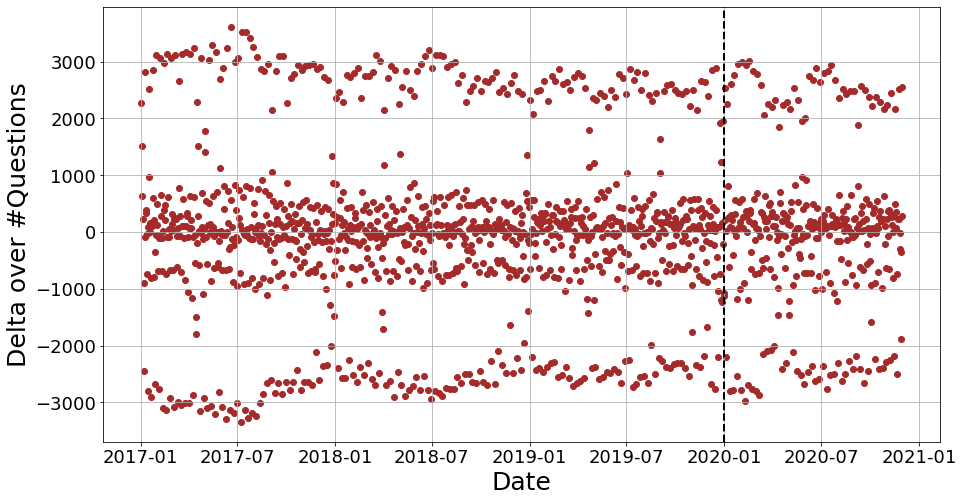

In [253]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(ques_daily_grp_delta_notna['day_date'],ques_daily_grp_delta_notna['count_delta'],color='brown')
plt.ylabel('Delta over #Questions',fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()
plt.xlabel('Date',fontsize=25)
ax.axvline(pd.to_datetime('2020-01'), color='black', linestyle='--', lw=2)
plt.savefig('figs/SO_QuestionsDailyScatterPlot.pdf',bbox_inches='tight')

In [31]:
ques_daily_grp_delta_notna[ques_daily_grp_delta_notna['count_delta']>2000]

,day_date,counts,count_delta
1,2017-01-02,4657,2281.0
8,2017-01-09,6435,2824.0
15,2017-01-16,6207,2517.0
22,2017-01-23,6596,2856.0
29,2017-01-30,6667,3113.0
...,...,...,...
1401,2020-11-02,6109,2245.0
1408,2020-11-09,6616,2447.0
1415,2020-11-16,6479,2164.0
1422,2020-11-23,6871,2514.0


In [32]:
ques_daily_grp_delta_notna[ques_daily_grp_delta_notna['count_delta']<-2000]

,day_date,counts,count_delta
6,2017-01-07,3704,-2440.0
13,2017-01-14,3608,-2796.0
20,2017-01-21,3630,-2898.0
27,2017-01-28,3602,-2684.0
34,2017-02-04,3802,-2769.0
...,...,...,...
1392,2020-10-24,3631,-2395.0
1399,2020-10-31,3633,-2289.0
1406,2020-11-07,3876,-2256.0
1413,2020-11-14,4011,-2190.0


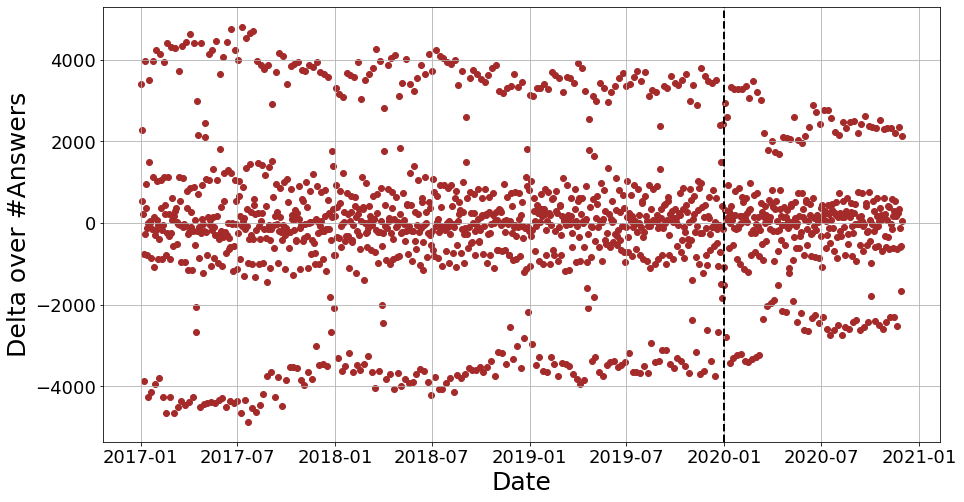

In [260]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(ans_daily_grp_delta_notna['day_date'],ans_daily_grp_delta_notna['count_delta'],color='brown')
plt.ylabel('Delta over #Answers',fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()
plt.xlabel('Date',fontsize=25)
ax.axvline(pd.to_datetime('2020-01'), color='black', linestyle='--', lw=2)
plt.savefig('figs/SO_AnswersDailyScatterPlot.pdf',bbox_inches='tight')

In [34]:
is_normal_shapiro(ques_daily_grp_delta_notna['count_delta'])

Statistics=0.920, p=0.000
Sample does not look Gaussian (reject H0)


(array([ 77., 113.,  16., 178., 474., 343.,  24.,  20., 138.,  46.]),
 array([-3346. , -2649.7, -1953.4, -1257.1,  -560.8,   135.5,   831.8,
         1528.1,  2224.4,  2920.7,  3617. ]),
 <BarContainer object of 10 artists>)

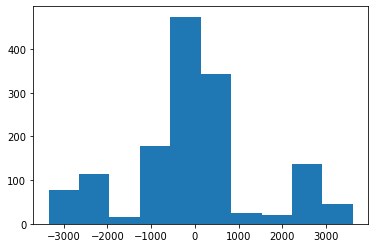

In [35]:
plt.hist(ques_daily_grp_delta_notna['count_delta'])

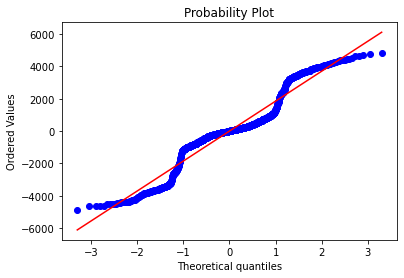

In [36]:
import pylab 
stats.probplot(ans_daily_grp_delta_notna['count_delta'], dist="norm", plot=pylab)
pylab.show()

In [37]:
is_normal_shapiro(ans_daily_grp_delta_notna['count_delta'])

Statistics=0.929, p=0.000
Sample does not look Gaussian (reject H0)


(array([ 43., 110.,  45.,  60., 428., 471.,  68.,  45., 107.,  52.]),
 array([-4871. , -3902.9, -2934.8, -1966.7,  -998.6,   -30.5,   937.6,
         1905.7,  2873.8,  3841.9,  4810. ]),
 <BarContainer object of 10 artists>)

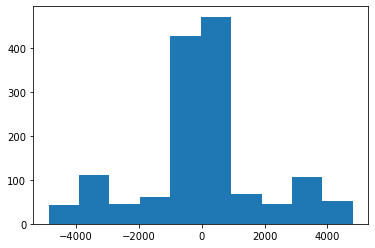

In [38]:
plt.hist(ans_daily_grp_delta_notna['count_delta'])

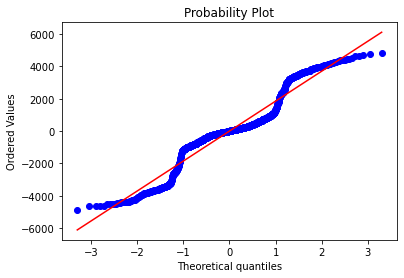

In [39]:
import pylab 
stats.probplot(ans_daily_grp_delta_notna['count_delta'], dist="norm", plot=pylab)
pylab.show()

In [40]:
ques_daily_grp_delta_notna_17_19=ques_daily_grp_delta_notna[ques_daily_grp_delta_notna['day_date']<'2020-01-01']
len(ques_daily_grp_delta_notna_17_19)

1094

In [41]:
ans_daily_grp_delta_notna_17_19=ans_daily_grp_delta_notna[ans_daily_grp_delta_notna['day_date']<'2020-01-01']
len(ans_daily_grp_delta_notna_17_19)

1094

In [42]:
ques_daily_grp_delta_notna_20=ques_daily_grp_delta_notna[ques_daily_grp_delta_notna['day_date']>='2020-01-01']
len(ques_daily_grp_delta_notna_20)

335

In [43]:
ans_daily_grp_delta_notna_20=ans_daily_grp_delta_notna[ans_daily_grp_delta_notna['day_date']>='2020-01-01']
len(ans_daily_grp_delta_notna_20)

335

In [44]:
def do_meanwhit(df1,df2):
    stat, p = stats.mannwhitneyu(df1['count_delta'], df2['count_delta'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [45]:
def do_ttest(df1,df2):
    stat, p = stats.ttest_ind(df1['count_delta'], df2['count_delta'],equal_var=False)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [46]:
do_meanwhit(ques_daily_grp_delta_notna_17_19,ques_daily_grp_delta_notna_20)

Statistics=176882.000, p=0.168
Same distribution (fail to reject H0)


In [212]:
ques_daily_grp_delta_notna_17_19['count_delta'].mean()

1.3784277879341864

In [213]:
ques_daily_grp_delta_notna_20['count_delta'].mean()

10.48955223880597

In [47]:
do_meanwhit(ans_daily_grp_delta_notna_17_19,ans_daily_grp_delta_notna_20)

Statistics=180304.500, p=0.328
Same distribution (fail to reject H0)


In [214]:
ans_daily_grp_delta_notna_17_19['count_delta'].mean()

1.482632541133455

In [215]:
ans_daily_grp_delta_notna_20['count_delta'].mean()

4.856716417910448

RQ3

In [48]:
ques_daily_grp_delta_notna_17=ques_daily_grp_delta_notna[(ques_daily_grp_delta_notna['day_date']>='2017-01-01')
                                                           & (ques_daily_grp_delta_notna['day_date']<'2018-01-01')]
len(ques_daily_grp_delta_notna_17)

364

In [49]:
ques_daily_grp_delta_notna_18=ques_daily_grp_delta_notna[(ques_daily_grp_delta_notna['day_date']>='2018-01-01')
                                                           & (ques_daily_grp_delta_notna['day_date']<'2019-01-01')]
len(ques_daily_grp_delta_notna_18)

365

In [50]:
ques_daily_grp_delta_notna_19=ques_daily_grp_delta_notna[(ques_daily_grp_delta_notna['day_date']>='2019-01-01')
                                                           & (ques_daily_grp_delta_notna['day_date']<'2020-01-01')]
len(ques_daily_grp_delta_notna_19)

365

In [51]:
do_meanwhit(ques_daily_grp_delta_notna_17,ques_daily_grp_delta_notna_20)

Statistics=58785.000, p=0.206
Same distribution (fail to reject H0)


In [52]:
do_meanwhit(ques_daily_grp_delta_notna_18,ques_daily_grp_delta_notna_20)

Statistics=58525.000, p=0.164
Same distribution (fail to reject H0)


In [53]:
do_meanwhit(ques_daily_grp_delta_notna_19,ques_daily_grp_delta_notna_20)

Statistics=59572.000, p=0.279
Same distribution (fail to reject H0)


In [216]:
ques_daily_grp_delta_notna_17['count_delta'].mean()

-0.24725274725274726

In [217]:
ques_daily_grp_delta_notna_18['count_delta'].mean()

1.9589041095890412

In [218]:
ques_daily_grp_delta_notna_19['count_delta'].mean()

2.419178082191781

In [219]:
ques_daily_grp_delta_notna_20['count_delta'].mean()

10.48955223880597

In [224]:
ques_daily_grp_delta_notna_17['count_delta'].var()

2571849.4758877484

In [225]:
ques_daily_grp_delta_notna_18['count_delta'].var()

2096831.9186361583

In [226]:
ques_daily_grp_delta_notna_19['count_delta'].var()

1873660.821059762

In [227]:
ques_daily_grp_delta_notna_20['count_delta'].var()

1898210.5320761465

0.9999999999999999
0.7923107158378175


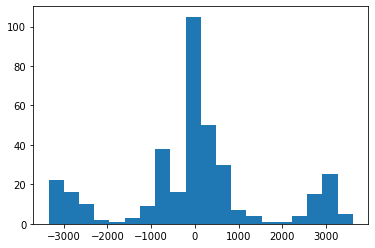

In [242]:
y, x, _=plt.hist(ques_daily_grp_delta_notna_17['count_delta'],bins=20)
probs_17=y/len(ques_daily_grp_delta_notna_17['count_delta'])
print(probs_17.sum())
print(stats.entropy(probs_17,base=20)) 

1.0
0.780173301666658


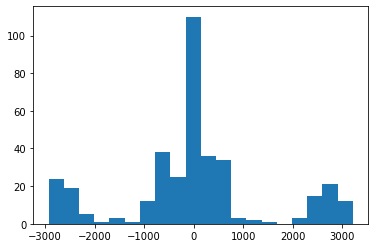

In [243]:
y, x, _=plt.hist(ques_daily_grp_delta_notna_18['count_delta'],bins=20)
probs_18=y/len(ques_daily_grp_delta_notna_18['count_delta'])
print(probs_18.sum())
print(stats.entropy(probs_18,base=20)) 

0.9999999999999999
0.8098154446384491


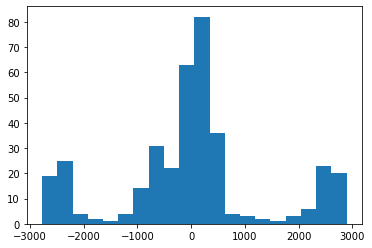

In [244]:
y, x, _=plt.hist(ques_daily_grp_delta_notna_19['count_delta'],bins=20)
probs_19=y/len(ques_daily_grp_delta_notna_19['count_delta'])
print(probs_19.sum())
print(stats.entropy(probs_19,base=20)) 

1.0000000000000002
0.8075294347688572


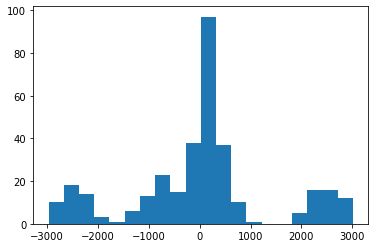

In [245]:
y, x, _=plt.hist(ques_daily_grp_delta_notna_20['count_delta'],bins=20)
probs_20=y/len(ques_daily_grp_delta_notna_20['count_delta'])
print(probs_20.sum())
print(stats.entropy(probs_20,base=20)) 

In [54]:
ans_daily_grp_delta_notna_17=ans_daily_grp_delta_notna[(ans_daily_grp_delta_notna['day_date']>='2017-01-01')
                                                           & (ans_daily_grp_delta_notna['day_date']<'2018-01-01')]
len(ans_daily_grp_delta_notna_17)

364

In [55]:
ans_daily_grp_delta_notna_18=ans_daily_grp_delta_notna[(ans_daily_grp_delta_notna['day_date']>='2018-01-01')
                                                           & (ans_daily_grp_delta_notna['day_date']<'2019-01-01')]
len(ans_daily_grp_delta_notna_18)

365

In [56]:
ans_daily_grp_delta_notna_19=ans_daily_grp_delta_notna[(ans_daily_grp_delta_notna['day_date']>='2019-01-01')
                                                           & (ans_daily_grp_delta_notna['day_date']<'2020-01-01')]
len(ans_daily_grp_delta_notna_19)

365

In [57]:
do_meanwhit(ans_daily_grp_delta_notna_17,ans_daily_grp_delta_notna_20)

Statistics=59411.500, p=0.280
Same distribution (fail to reject H0)


In [58]:
do_meanwhit(ans_daily_grp_delta_notna_18,ans_daily_grp_delta_notna_20)

Statistics=60024.000, p=0.339
Same distribution (fail to reject H0)


In [59]:
do_meanwhit(ans_daily_grp_delta_notna_19,ans_daily_grp_delta_notna_20)

Statistics=60869.000, p=0.460
Same distribution (fail to reject H0)


In [220]:
ans_daily_grp_delta_notna_17['count_delta'].mean()

-0.25274725274725274

In [221]:
ans_daily_grp_delta_notna_18['count_delta'].mean()

3.221917808219178

In [222]:
ans_daily_grp_delta_notna_19['count_delta'].mean()

1.473972602739726

In [223]:
ans_daily_grp_delta_notna_20['count_delta'].mean()

4.856716417910448

In [228]:
ans_daily_grp_delta_notna_17['count_delta'].var()

5047800.073683891

In [229]:
ans_daily_grp_delta_notna_18['count_delta'].var()

3954864.6127051036

In [230]:
ans_daily_grp_delta_notna_19['count_delta'].var()

3546847.5961613734

In [231]:
ans_daily_grp_delta_notna_20['count_delta'].var()

2037858.6500670302

1.0
0.8192370503497817


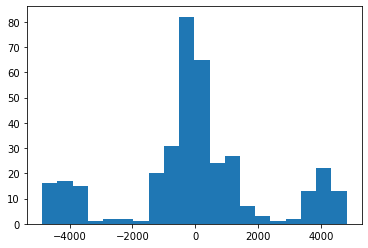

In [256]:
y, x, _=plt.hist(ans_daily_grp_delta_notna_17['count_delta'],bins=20)
probs_a_17=y/len(ans_daily_grp_delta_notna_17['count_delta'])
print(probs_a_17.sum())
print(stats.entropy(probs_a_17,base=20)) 

1.0
0.8001182133914979


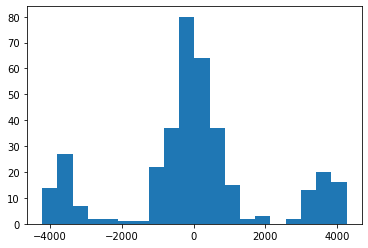

In [257]:
y, x, _=plt.hist(ans_daily_grp_delta_notna_18['count_delta'],bins=20)
probs_a_18=y/len(ans_daily_grp_delta_notna_18['count_delta'])
print(probs_a_18.sum())
print(stats.entropy(probs_a_18,base=20)) 

1.0
0.821495597251716


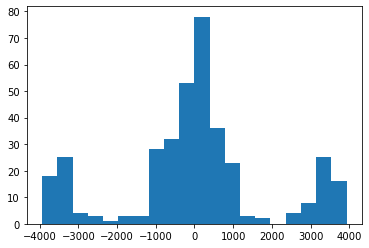

In [258]:
y, x, _=plt.hist(ans_daily_grp_delta_notna_19['count_delta'],bins=20)
probs_a_19=y/len(ans_daily_grp_delta_notna_19['count_delta'])
print(probs_a_19.sum())
print(stats.entropy(probs_a_19,base=20)) 

1.0000000000000002
0.8202640046952684


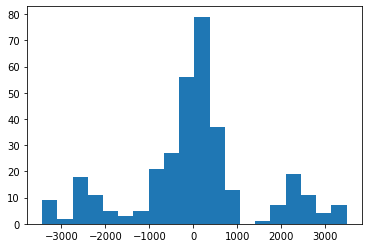

In [259]:
y, x, _=plt.hist(ans_daily_grp_delta_notna_20['count_delta'],bins=20)
probs_a_20=y/len(ans_daily_grp_delta_notna_20['count_delta'])
print(probs_a_20.sum())
print(stats.entropy(probs_a_20,base=20)) 

In [60]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
#     print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
#     print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
#     print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
#     print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
#     print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
#     print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [61]:
yearly_monthly_ques=getYearlyMonthlyCreation(data_q)

In [62]:
yearly_monthly_ans=getYearlyMonthlyCreation(data_a)

In [63]:
yearly_monthly_ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CreateYearMonth  47 non-null     datetime64[ns]
 1   counts           47 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 880.0 bytes


In [64]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

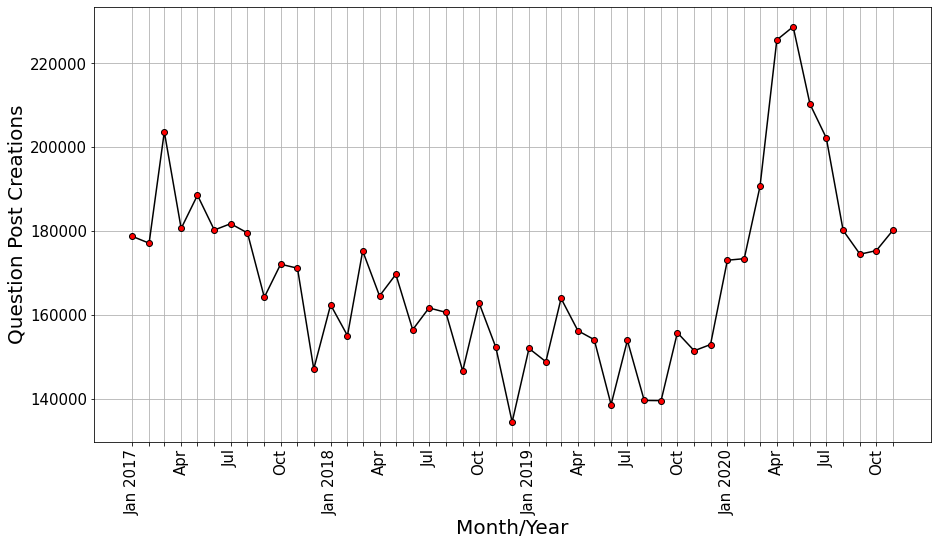

In [65]:
# yearly_monthly_ques.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_ques['CreateYearMonth'],yearly_monthly_ques['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_ques['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Question Post Creations',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_QuestionsYearltMonthlyPlot.pdf',bbox_inches='tight')
# plt.ylabel('Question Post Creations')

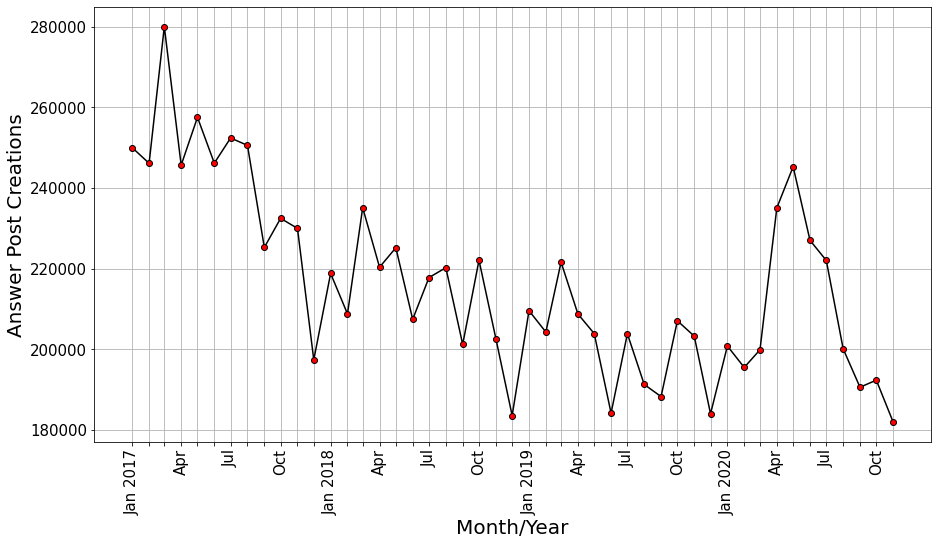

In [66]:
# yearly_monthly_ans.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Answer Post Creations')

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_ans['CreateYearMonth'],yearly_monthly_ans['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_ans['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Answer Post Creations',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_AnswersYearltMonthlyPlot.pdf',bbox_inches='tight')

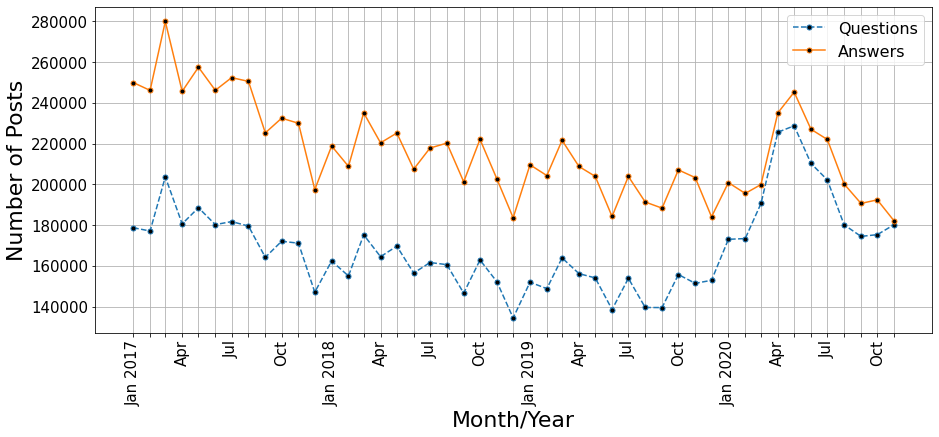

In [67]:
fig, ax = plt.subplots(figsize=(15,6))


lbl="Questions"
plt.plot(yearly_monthly_ques['CreateYearMonth'],yearly_monthly_ques['counts'],linestyle='dashed',marker='.',
         markerfacecolor='black',markersize=10,label=lbl)

lbl="Answers"
plt.plot(yearly_monthly_ans['CreateYearMonth'],yearly_monthly_ans['counts'],marker='.',markerfacecolor='black',
         markersize=10,label=lbl)
#     group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
plt.legend(loc="upper right",prop={'size': 16})
plt.xticks(yearly_monthly_ques['CreateYearMonth'], months_xticks,fontsize=15,rotation=90) #use ans_yearly_monthly_weekend_grp['CreateYearMonth'] since ans_yearly_monthly_weekend_weekday_grp has two values for each month (weekend and weekday)
plt.yticks(fontsize=15)
plt.ylabel('Number of Posts',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_QuestionsAnswersYearlyMonthly.pdf',bbox_inches='tight')

In [68]:
def fit_reg_line(df,ticks,date_column,count_column):
    x = np.arange(df[date_column].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
    fit = np.polyfit(x, df[count_column], 1)
    fit_fn = np.poly1d(fit)

    fig, ax = plt.subplots(figsize=(15,8))
    plt.plot(df[date_column], fit_fn(x), 'k-')
    plt.scatter(df[date_column],df[count_column])
    plt.xticks(df[date_column], ticks,fontsize=15,rotation=90)
    plt.show()

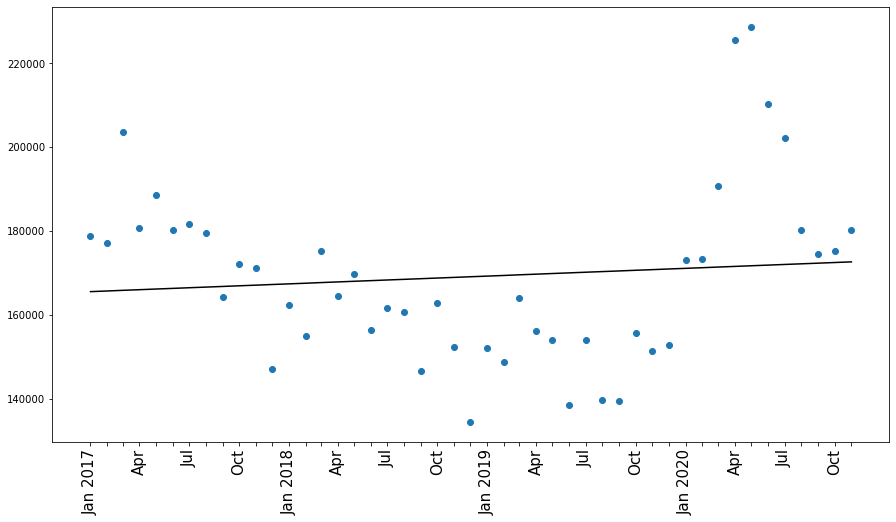

In [69]:
fit_reg_line(yearly_monthly_ques,months_xticks,'CreateYearMonth','counts')

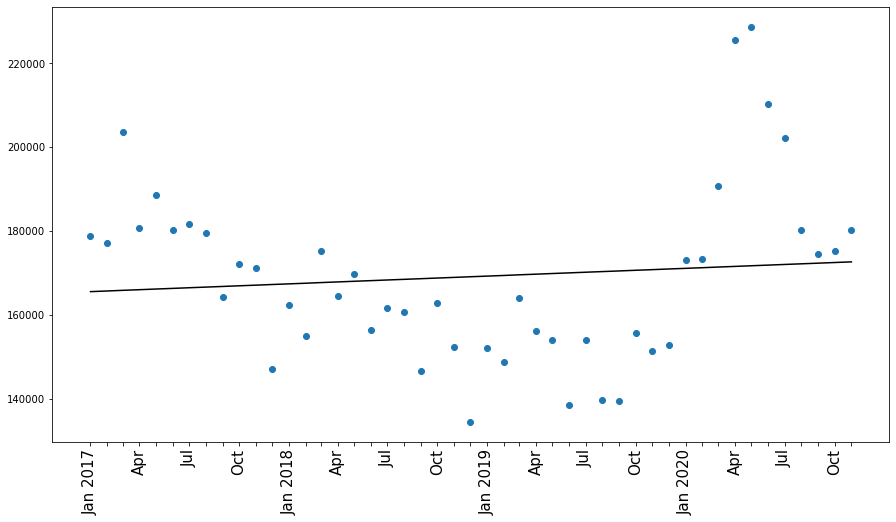

In [70]:
fit_reg_line(yearly_monthly_ques,months_xticks,'CreateYearMonth','counts')

In [71]:
#df should be monthly yearly data
def to_bimonthly(df):
    d={'counts':'sum'}
    bi_counts=df.groupby(df.index  // 2).agg(d)
    monthYear=df['CreateYearMonth']
#     monthYear['months']=monthYear[::2]
    bi_months = pd.DataFrame({"months":monthYear[::2]}) 
    bi_months.index = np.arange(1, len(bi_months) + 1)
    bi_counts.index=np.arange(1, len(bi_counts) + 1)
    result = pd.concat([bi_months, bi_counts], axis=1)
    result.drop(result.tail(1).index,inplace=True) # drop last row cause we do not have dec data and so it only includes nov and becomes small
    return result

In [72]:
bimonthly_yearly_ques=to_bimonthly(yearly_monthly_ques)
bimonthly_yearly_ques

,months,counts
1,2017-01-01,355777
2,2017-03-01,384240
3,2017-05-01,368733
4,2017-07-01,361240
5,2017-09-01,336210
6,2017-11-01,318151
7,2018-01-01,317361
8,2018-03-01,339698
9,2018-05-01,326061
10,2018-07-01,322184


In [73]:
bimonthly_yearly_ans=to_bimonthly(yearly_monthly_ans)
bimonthly_yearly_ans

,months,counts
1,2017-01-01,496078
2,2017-03-01,525600
3,2017-05-01,503652
4,2017-07-01,502928
5,2017-09-01,457735
6,2017-11-01,427403
7,2018-01-01,427628
8,2018-03-01,455467
9,2018-05-01,432631
10,2018-07-01,438045


In [345]:
bimonthly_ques_by_ans=pd.merge(bimonthly_yearly_ques,bimonthly_yearly_ans,how='inner', left_on= ['months'],right_on= ['months'])
len(bimonthly_ques_by_ans)

23

In [346]:
bimonthly_ques_by_ans

,months,counts_x,count_delta_x,counts_y,count_delta_y
0,2017-01-01,355777,NaN,496078,NaN
1,2017-03-01,384240,28463.0,525600,29522.0
2,2017-05-01,368733,-15507.0,503652,-21948.0
3,2017-07-01,361240,-7493.0,502928,-724.0
4,2017-09-01,336210,-25030.0,457735,-45193.0
5,2017-11-01,318151,-18059.0,427403,-30332.0
6,2018-01-01,317361,-790.0,427628,225.0
7,2018-03-01,339698,22337.0,455467,27839.0
8,2018-05-01,326061,-13637.0,432631,-22836.0
9,2018-07-01,322184,-3877.0,438045,5414.0


In [352]:
bimonthly_ques_by_ans =bimonthly_ques_by_ans.rename(columns={'counts_x': 'num_ques', 'counts_y': 'num_ans'})

In [353]:
bimonthly_ques_by_ans.head()

,months,num_ques,count_delta_x,num_ans,count_delta_y
0,2017-01-01,355777,NaN,496078,NaN
1,2017-03-01,384240,28463.0,525600,29522.0
2,2017-05-01,368733,-15507.0,503652,-21948.0
3,2017-07-01,361240,-7493.0,502928,-724.0
4,2017-09-01,336210,-25030.0,457735,-45193.0


In [354]:
bimonthly_ques_by_ans['ques_by_ans']=bimonthly_ques_by_ans['num_ques']/bimonthly_ques_by_ans['num_ans']

In [355]:
bimonthly_ques_by_ans.head()

,months,num_ques,count_delta_x,num_ans,count_delta_y,ques_by_ans
0,2017-01-01,355777,NaN,496078,NaN,0.717180
1,2017-03-01,384240,28463.0,525600,29522.0,0.731050
2,2017-05-01,368733,-15507.0,503652,-21948.0,0.732119
3,2017-07-01,361240,-7493.0,502928,-724.0,0.718274
4,2017-09-01,336210,-25030.0,457735,-45193.0,0.734508


In [356]:
adf_test(bimonthly_ques_by_ans['ques_by_ans'])

Results of Dickey-Fuller Test:
ADF Statistic: 1.057583
p-value: 0.994838
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Result: The series is not stationary


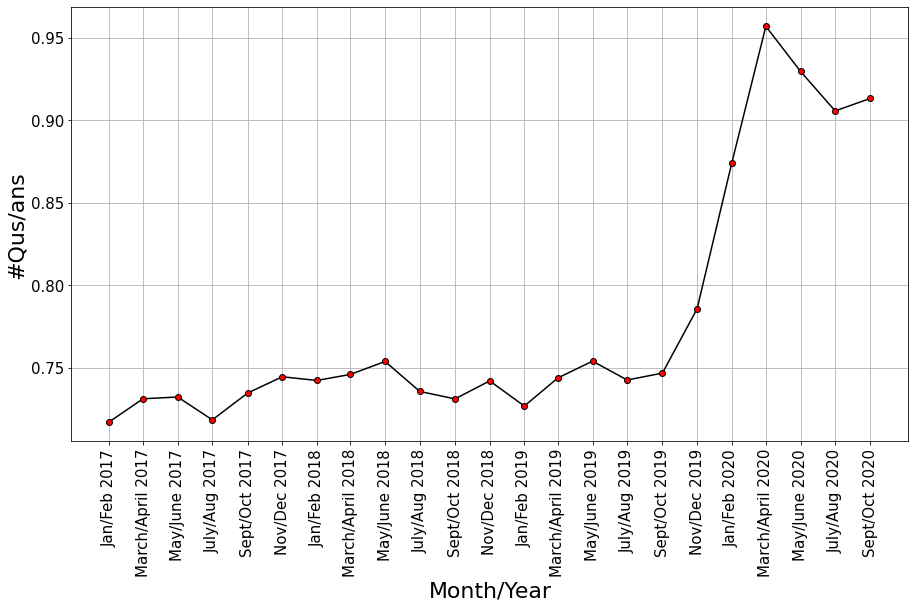

In [357]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_ques_by_ans['months'],bimonthly_ques_by_ans['ques_by_ans'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_ques_by_ans['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Qus/ans',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
# plt.savefig('figs/SO_QuestionsBiMonthly.pdf',bbox_inches='tight')

In [358]:
bimonthly_ques_by_ans['ques_by_ans_delta'] = bimonthly_ques_by_ans['ques_by_ans'].diff()
bimonthly_ques_by_ans

,months,num_ques,count_delta_x,num_ans,count_delta_y,ques_by_ans,ques_by_ans_delta
0,2017-01-01,355777,NaN,496078,NaN,0.717180,NaN
1,2017-03-01,384240,28463.0,525600,29522.0,0.731050,0.013871
2,2017-05-01,368733,-15507.0,503652,-21948.0,0.732119,0.001068
3,2017-07-01,361240,-7493.0,502928,-724.0,0.718274,-0.013845
4,2017-09-01,336210,-25030.0,457735,-45193.0,0.734508,0.016234
5,2017-11-01,318151,-18059.0,427403,-30332.0,0.744382,0.009874
6,2018-01-01,317361,-790.0,427628,225.0,0.742143,-0.002239
7,2018-03-01,339698,22337.0,455467,27839.0,0.745824,0.003681
8,2018-05-01,326061,-13637.0,432631,-22836.0,0.753670,0.007846
9,2018-07-01,322184,-3877.0,438045,5414.0,0.735504,-0.018166


In [359]:
bimonthly_ques_by_ans_deltaclean=bimonthly_ques_by_ans[1:]
bimonthly_ques_by_ans_deltaclean

,months,num_ques,count_delta_x,num_ans,count_delta_y,ques_by_ans,ques_by_ans_delta
1,2017-03-01,384240,28463.0,525600,29522.0,0.731050,0.013871
2,2017-05-01,368733,-15507.0,503652,-21948.0,0.732119,0.001068
3,2017-07-01,361240,-7493.0,502928,-724.0,0.718274,-0.013845
4,2017-09-01,336210,-25030.0,457735,-45193.0,0.734508,0.016234
5,2017-11-01,318151,-18059.0,427403,-30332.0,0.744382,0.009874
6,2018-01-01,317361,-790.0,427628,225.0,0.742143,-0.002239
7,2018-03-01,339698,22337.0,455467,27839.0,0.745824,0.003681
8,2018-05-01,326061,-13637.0,432631,-22836.0,0.753670,0.007846
9,2018-07-01,322184,-3877.0,438045,5414.0,0.735504,-0.018166
10,2018-09-01,309444,-12740.0,423334,-14711.0,0.730969,-0.004535


In [360]:
bimonthly_ques_by_ans_deltaclean.index-=1


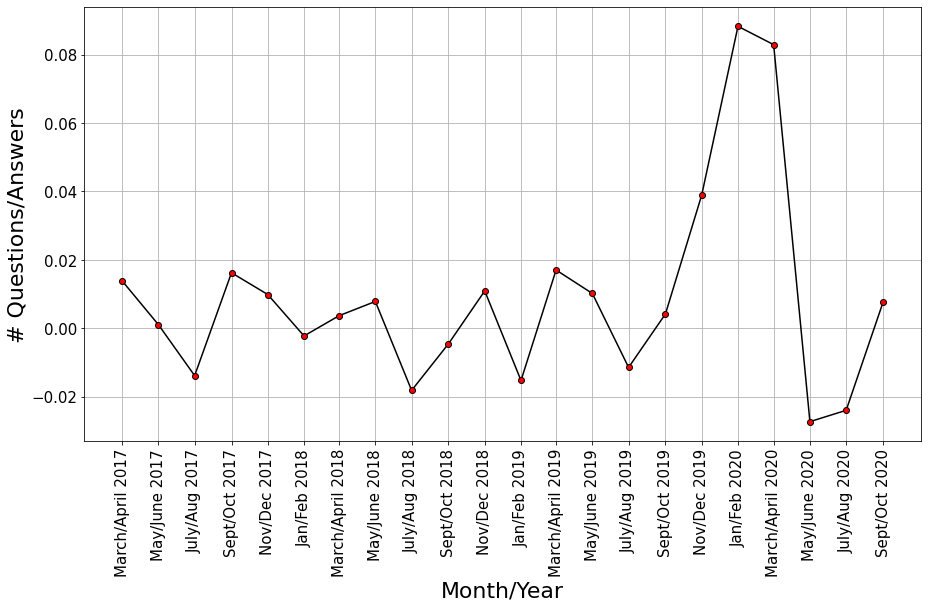

In [361]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_ques_by_ans_deltaclean['months'],bimonthly_ques_by_ans_deltaclean['ques_by_ans_delta'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_ques_by_ans_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('# Questions/Answers',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
plt.savefig('figs/SO_QuesByAnsBiMonthlyDelta.pdf',bbox_inches='tight')

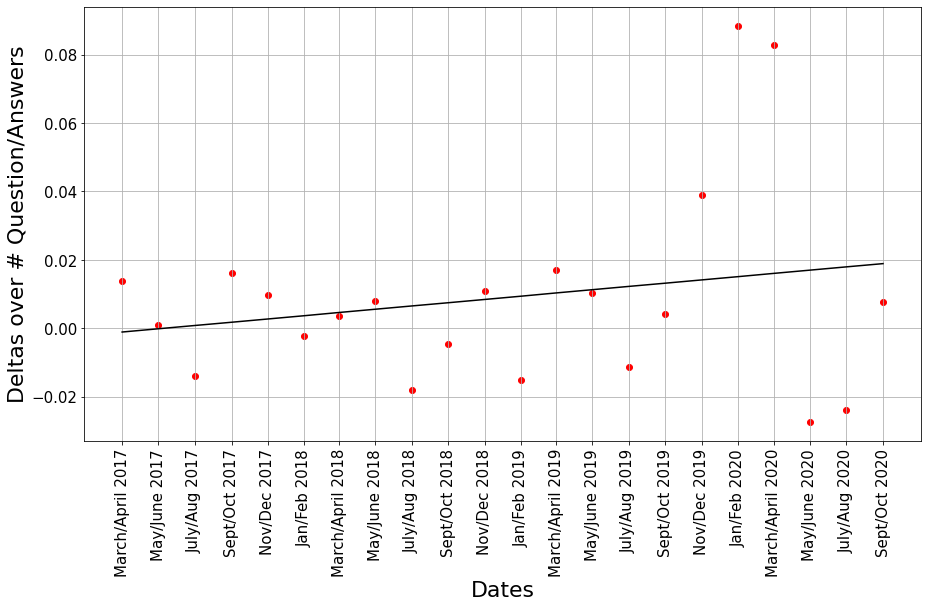

In [362]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_ques_by_ans_deltaclean['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_ques_by_ans_deltaclean['ques_by_ans_delta'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_ques_by_ans_deltaclean['months'], predictions, 'k-')
plt.scatter(bimonthly_ques_by_ans_deltaclean['months'],bimonthly_ques_by_ans_deltaclean['ques_by_ans_delta'],color='red')
plt.xticks(bimonthly_ques_by_ans_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Deltas over # Question/Answers',fontsize=22)
plt.xlabel('Dates',fontsize=22)
plt.grid()
plt.savefig('figs/SO_QuestionsByAswersBiMonthlyDeltasRegressline.pdf',bbox_inches='tight')

In [363]:
bimonthly_ques_by_ans_deltaclean['ques_by_ans_delta'].mean()

0.008906393596085587

In [364]:
bimonthly_ques_by_ans_deltaclean['ques_by_ans_delta'].std()

0.029193691722127452

In [74]:
adf_test(yearly_monthly_ques['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.273621
p-value: 0.180617
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Result: The series is not stationary


In [75]:
adf_test(yearly_monthly_ques['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.273621
p-value: 0.180617
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Result: The series is not stationary


In [76]:
kpss_test(yearly_monthly_ans['counts'])

KPSS Statistic: 0.446985277885289
p-value: 0.0569028974632375
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [77]:
kpss_test(yearly_monthly_ans['counts'])

KPSS Statistic: 0.446985277885289
p-value: 0.0569028974632375
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [78]:
#remove nov/dec 2020 cause we do not have dec data
bi_ticks=['Jan/Feb 2017','March/April 2017','May/June 2017','July/Aug 2017','Sept/Oct 2017','Nov/Dec 2017','Jan/Feb 2018','March/April 2018','May/June 2018','July/Aug 2018','Sept/Oct 2018','Nov/Dec 2018',
    'Jan/Feb 2019','March/April 2019','May/June 2019','July/Aug 2019','Sept/Oct 2019','Nov/Dec 2019','Jan/Feb 2020','March/April 2020','May/June 2020','July/Aug 2020','Sept/Oct 2020']

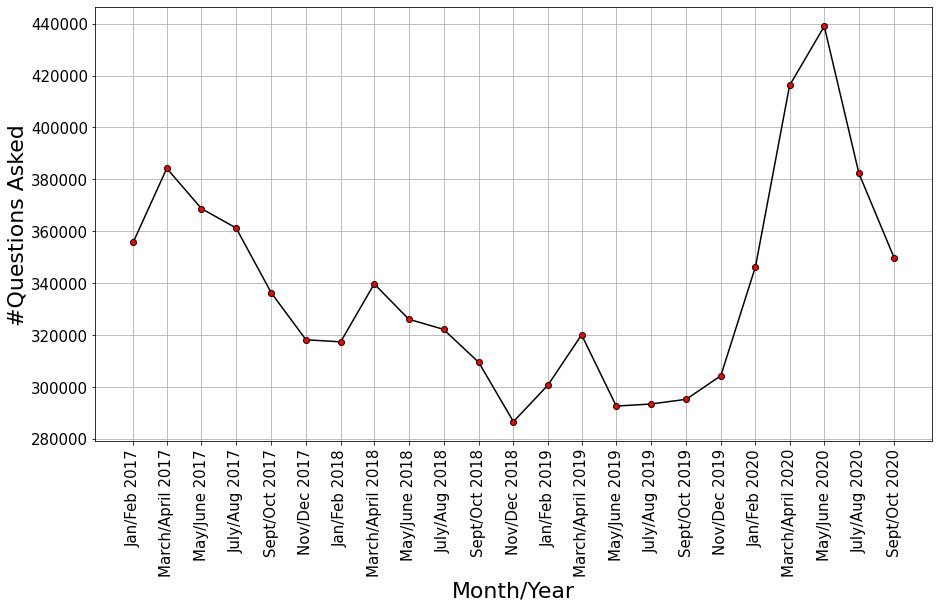

In [203]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ques['months'],bimonthly_yearly_ques['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_ques['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Questions Asked',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
plt.savefig('figs/SO_QuestionsBiMonthly.pdf',bbox_inches='tight')

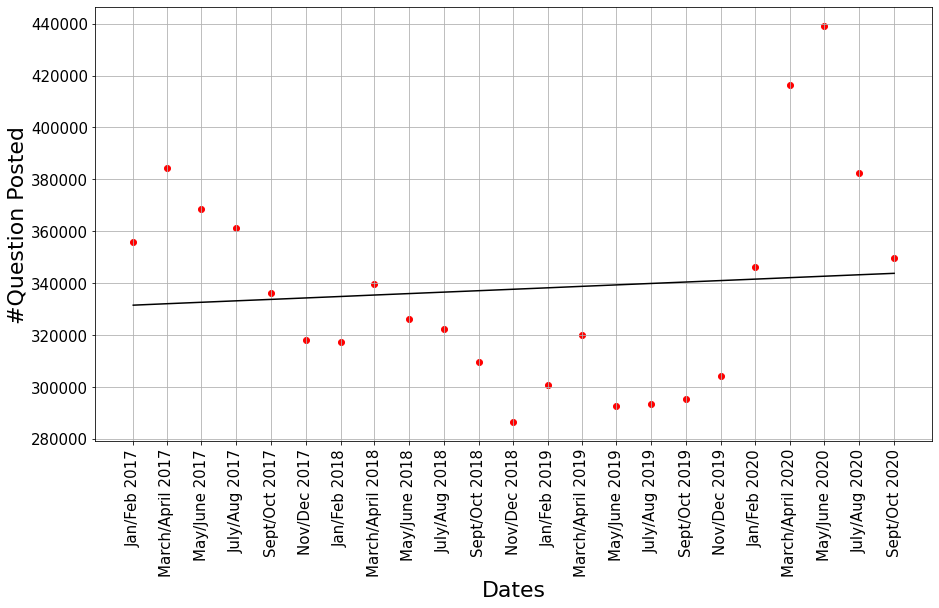

In [205]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_yearly_ques['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_yearly_ques['counts'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ques['months'], predictions, 'k-')
plt.scatter(bimonthly_yearly_ques['months'],bimonthly_yearly_ques['counts'],color='red')
plt.xticks(bimonthly_yearly_ques['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Question Posted',fontsize=22)
plt.xlabel('Dates',fontsize=22)
plt.grid()
plt.savefig('figs/SO_QuestionsBiMonthlyRegressline.pdf',bbox_inches='tight')

In [81]:
kpss_test(bimonthly_yearly_ques['counts'])

KPSS Statistic: 0.16127569559618782
p-value: 0.1
num lags: 9
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [82]:
adf_test(bimonthly_yearly_ques['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -3.397108
p-value: 0.011058
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Result: The series is stationary


In [206]:
bimonthly_yearly_ques['counts'].mean()

337633.1304347826

In [207]:
bimonthly_yearly_ques['counts'].std()

40353.77710642389

In [208]:
bimonthly_yearly_ques

,months,counts,count_delta
1,2017-01-01,355777,NaN
2,2017-03-01,384240,28463.0
3,2017-05-01,368733,-15507.0
4,2017-07-01,361240,-7493.0
5,2017-09-01,336210,-25030.0
6,2017-11-01,318151,-18059.0
7,2018-01-01,317361,-790.0
8,2018-03-01,339698,22337.0
9,2018-05-01,326061,-13637.0
10,2018-07-01,322184,-3877.0


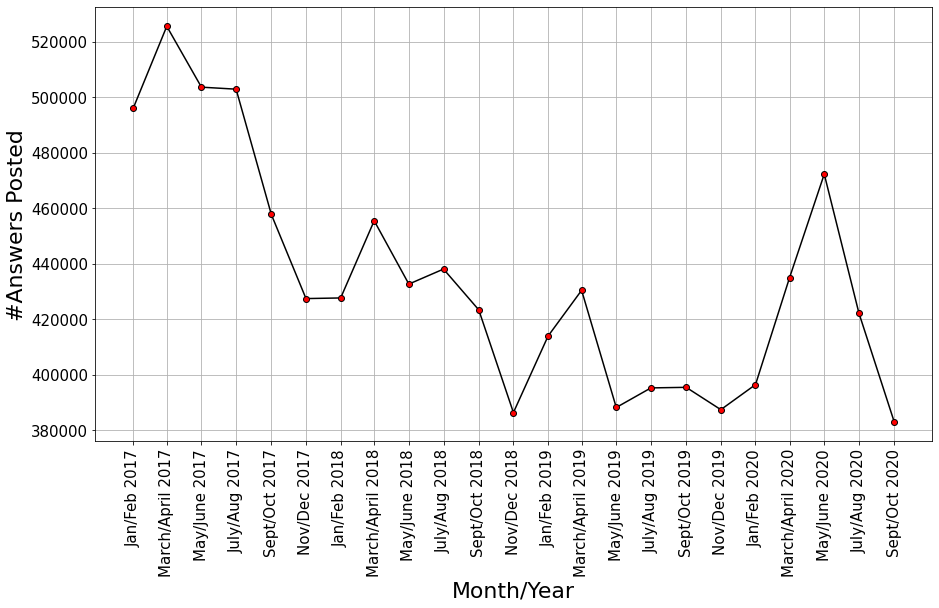

In [83]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ans['months'],bimonthly_yearly_ans['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_ans['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Answers Posted',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
plt.savefig('figs/SO_AnswersBiMonthly.pdf',bbox_inches='tight')

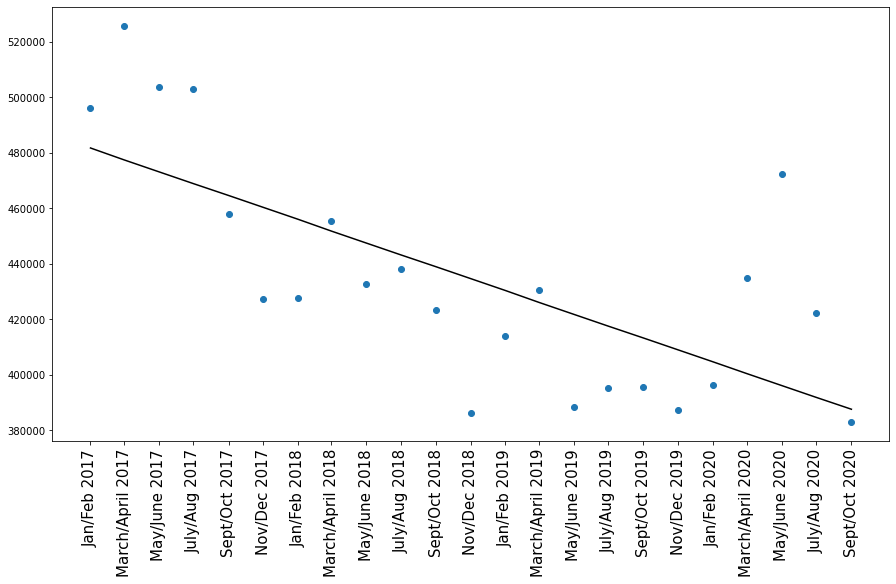

In [84]:
fit_reg_line(bimonthly_yearly_ans,bi_ticks,'months','counts')

In [85]:
bimonthly_yearly_ques['count_delta'] = bimonthly_yearly_ques['counts'].diff()
bimonthly_yearly_ques

,months,counts,count_delta
1,2017-01-01,355777,NaN
2,2017-03-01,384240,28463.0
3,2017-05-01,368733,-15507.0
4,2017-07-01,361240,-7493.0
5,2017-09-01,336210,-25030.0
6,2017-11-01,318151,-18059.0
7,2018-01-01,317361,-790.0
8,2018-03-01,339698,22337.0
9,2018-05-01,326061,-13637.0
10,2018-07-01,322184,-3877.0


In [86]:
bimonthly_yearly_ques_deltaclean=bimonthly_yearly_ques[1:]
bimonthly_yearly_ques_deltaclean.index-=1
bimonthly_yearly_ques_deltaclean

,months,counts,count_delta
1,2017-03-01,384240,28463.0
2,2017-05-01,368733,-15507.0
3,2017-07-01,361240,-7493.0
4,2017-09-01,336210,-25030.0
5,2017-11-01,318151,-18059.0
6,2018-01-01,317361,-790.0
7,2018-03-01,339698,22337.0
8,2018-05-01,326061,-13637.0
9,2018-07-01,322184,-3877.0
10,2018-09-01,309444,-12740.0


In [209]:
kpss_test(bimonthly_yearly_ans['counts'])

KPSS Statistic: 0.33545371474011115
p-value: 0.1
num lags: 9
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [210]:
adf_test(bimonthly_yearly_ans['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.316142
p-value: 0.166815
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Result: The series is not stationary


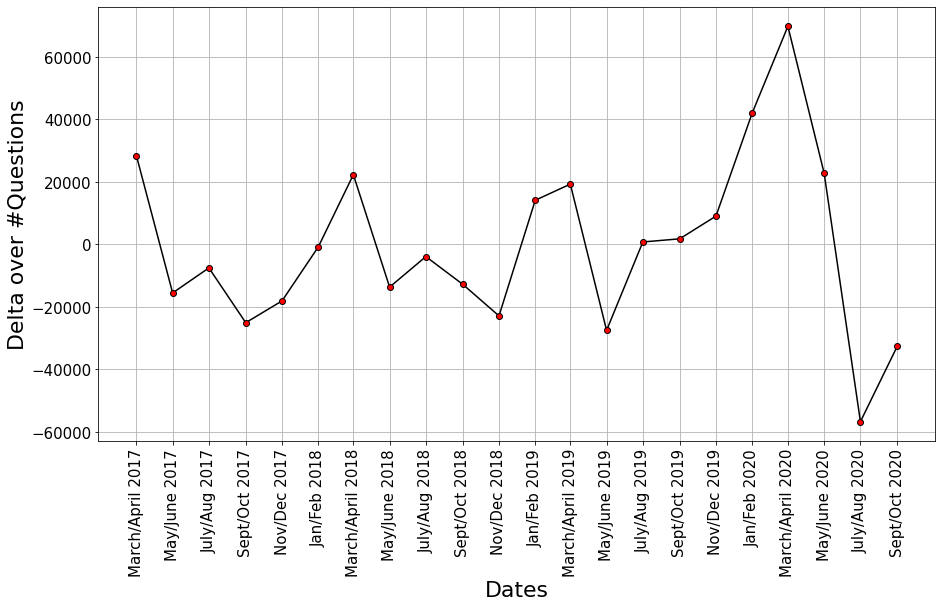

In [261]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ques_deltaclean['months'],bimonthly_yearly_ques_deltaclean['count_delta'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_ques_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Delta over #Questions',fontsize=22)
plt.xlabel('Dates',fontsize=22)
plt.grid()
plt.savefig('figs/SO_QuestionBiMonthlyDelta.pdf',bbox_inches='tight')

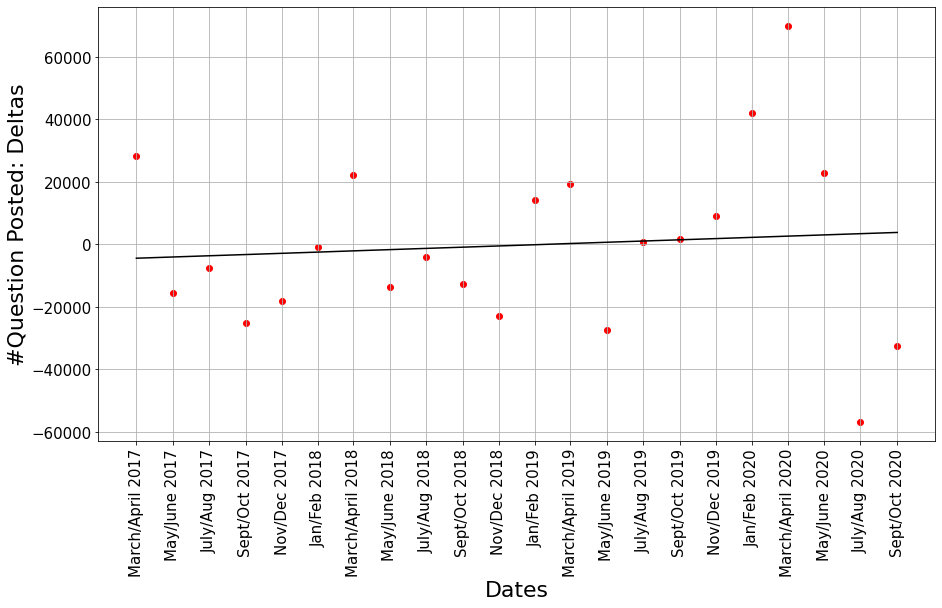

In [90]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_yearly_ques_deltaclean['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_yearly_ques_deltaclean['count_delta'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ques_deltaclean['months'], predictions, 'k-')
plt.scatter(bimonthly_yearly_ques_deltaclean['months'],bimonthly_yearly_ques_deltaclean['count_delta'],color='red')
plt.xticks(bimonthly_yearly_ques_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Question Posted: Deltas',fontsize=22)
plt.xlabel('Dates',fontsize=22)
plt.grid()
plt.savefig('figs/SO_QuestionsBiMonthlyDeltasRegressline.pdf',bbox_inches='tight')

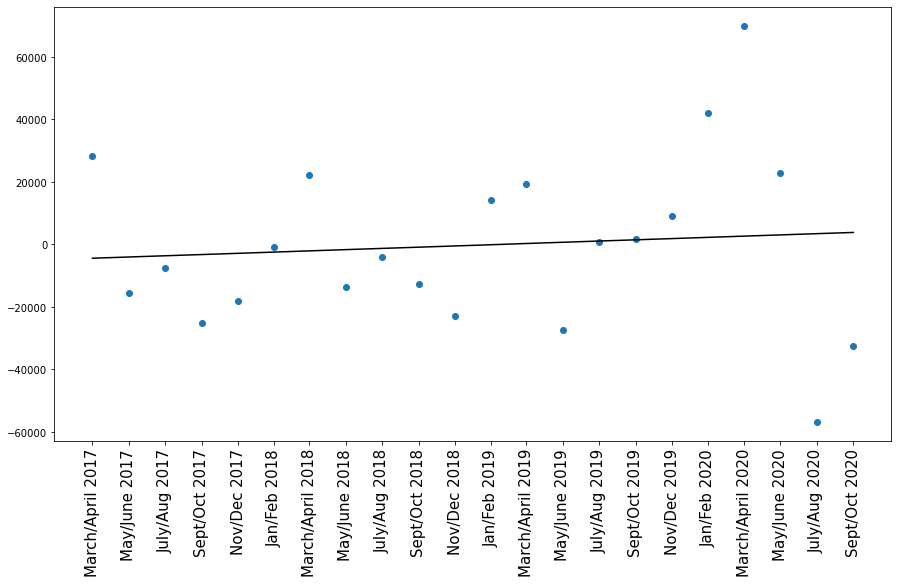

In [91]:
fit_reg_line(bimonthly_yearly_ques_deltaclean,bi_ticks[1:],'months','count_delta')



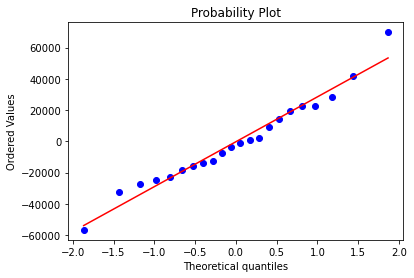

In [92]:
import pylab 
stats.probplot(bimonthly_yearly_ques_deltaclean['count_delta'], dist="norm", plot=pylab)
pylab.show()

In [93]:
bimonthly_yearly_ques_deltaclean['count_delta'].mean()

-274.59090909090907

In [94]:
bimonthly_yearly_ques_deltaclean['count_delta'].std()

27858.58348304555

In [95]:
bimonthly_yearly_ans['count_delta'] = bimonthly_yearly_ans['counts'].diff()
bimonthly_yearly_ans

,months,counts,count_delta
1,2017-01-01,496078,NaN
2,2017-03-01,525600,29522.0
3,2017-05-01,503652,-21948.0
4,2017-07-01,502928,-724.0
5,2017-09-01,457735,-45193.0
6,2017-11-01,427403,-30332.0
7,2018-01-01,427628,225.0
8,2018-03-01,455467,27839.0
9,2018-05-01,432631,-22836.0
10,2018-07-01,438045,5414.0


In [96]:
bimonthly_yearly_ans_deltaclean=bimonthly_yearly_ans[1:]
bimonthly_yearly_ans_deltaclean.index-=1
bimonthly_yearly_ans_deltaclean

,months,counts,count_delta
1,2017-03-01,525600,29522.0
2,2017-05-01,503652,-21948.0
3,2017-07-01,502928,-724.0
4,2017-09-01,457735,-45193.0
5,2017-11-01,427403,-30332.0
6,2018-01-01,427628,225.0
7,2018-03-01,455467,27839.0
8,2018-05-01,432631,-22836.0
9,2018-07-01,438045,5414.0
10,2018-09-01,423334,-14711.0


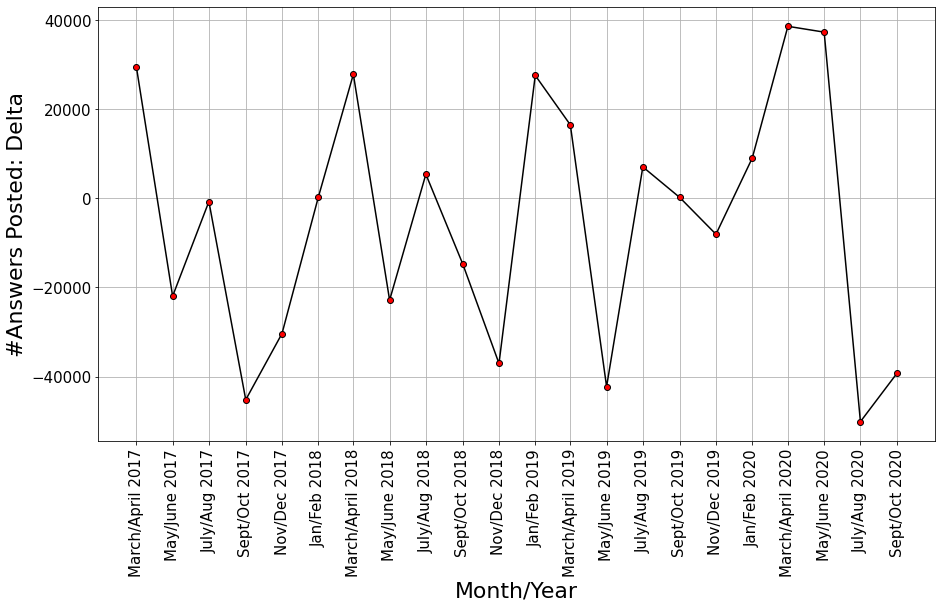

In [97]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ans_deltaclean['months'],bimonthly_yearly_ans_deltaclean['count_delta'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_ans_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Answers Posted: Delta',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

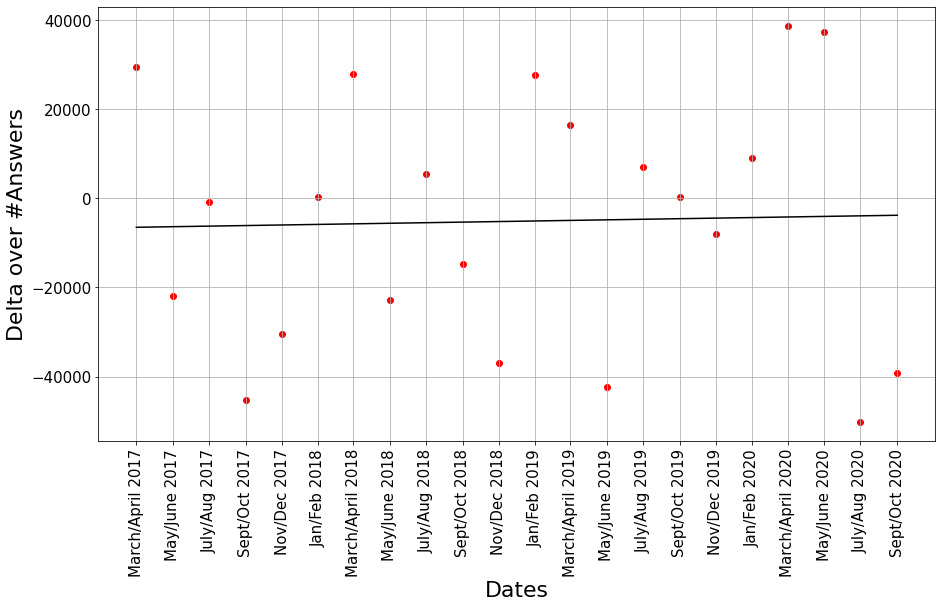

In [262]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_yearly_ans_deltaclean['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_yearly_ans_deltaclean['count_delta'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ans_deltaclean['months'], predictions, 'k-')
plt.scatter(bimonthly_yearly_ans_deltaclean['months'],bimonthly_yearly_ans_deltaclean['count_delta'],color='red')
plt.xticks(bimonthly_yearly_ans_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Delta over #Answers',fontsize=22)
plt.xlabel('Dates',fontsize=22)
plt.grid()
plt.savefig('figs/SO_AnswersBiMonthlyDeltasRegressline.pdf',bbox_inches='tight')

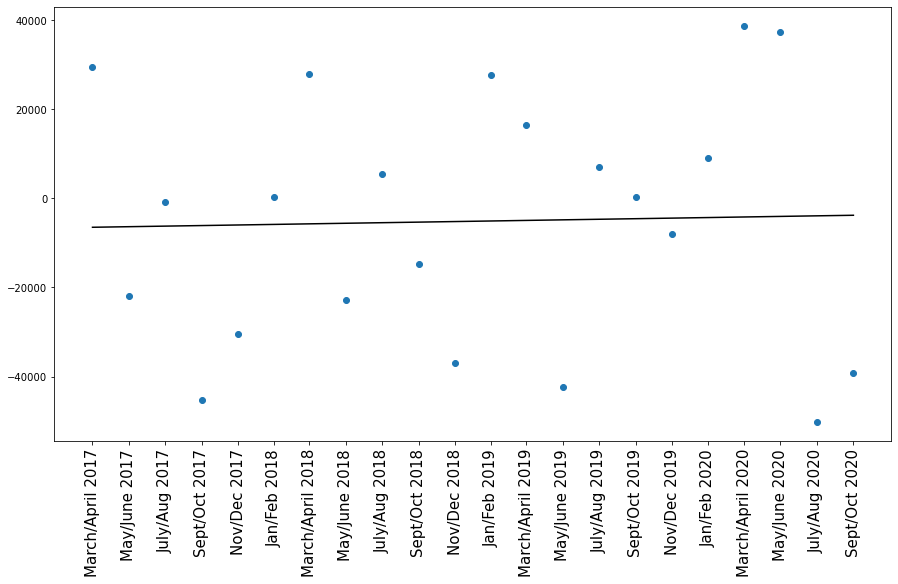

In [99]:
fit_reg_line(bimonthly_yearly_ans_deltaclean,bi_ticks[1:],'months','count_delta')

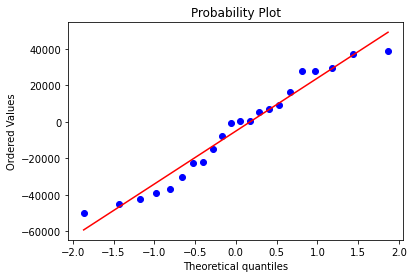

In [100]:
import pylab 
stats.probplot(bimonthly_yearly_ans_deltaclean['count_delta'], dist="norm", plot=pylab)
pylab.show()


In [101]:
bimonthly_yearly_ans_deltaclean['count_delta'].mean()

-5139.363636363636

In [102]:
bimonthly_yearly_ans_deltaclean['count_delta'].std()

28108.31638593724

In [103]:
stats.ttest_1samp(bimonthly_yearly_ans[18:]['count_delta'],bimonthly_yearly_ans[1:18]['count_delta'].mean())

Ttest_1sampResult(statistic=0.2955145947341035, pvalue=0.7823060673271433)

# Stats tests

Questions

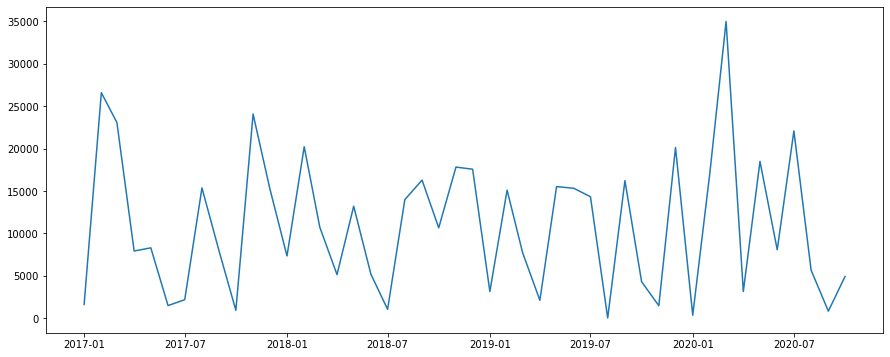

In [104]:
yearly_monthly_ques['count_delta'] = yearly_monthly_ques['counts'].diff().shift(-1).abs()
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(yearly_monthly_ques['CreateYearMonth'],yearly_monthly_ques['count_delta'])


In [105]:
yearly_monthly_ques['count_delta']

0      1631.0
1     26578.0
2     23062.0
3      7929.0
4      8303.0
5      1502.0
6      2194.0
7     15362.0
8      7888.0
9       945.0
10    24057.0
11    15309.0
12     7351.0
13    20211.0
14    10734.0
15     5151.0
16    13205.0
17     5192.0
18     1056.0
19    13982.0
20    16280.0
21    10660.0
22    17814.0
23    17563.0
24     3160.0
25    15099.0
26     7716.0
27     2121.0
28    15514.0
29    15319.0
30    14321.0
31       42.0
32    16215.0
33     4312.0
34     1489.0
35    20117.0
36      370.0
37    17240.0
38    34966.0
39     3157.0
40    18483.0
41     8074.0
42    22069.0
43     5666.0
44      846.0
45     4928.0
46        NaN
Name: count_delta, dtype: float64

In [106]:
yearly_monthly_ques_dec= yearly_monthly_ques['CreateYearMonth'].isin(['2017-12-01', '2018-12-01', '2019-12-01'])
yearly_monthly_ques_no_dec=yearly_monthly_ques[~yearly_monthly_ques_dec]

In [107]:
yearly_monthly_ques_no_dec

,CreateYearMonth,counts,count_delta
0,2017-01-01,178704,1631.0
1,2017-02-01,177073,26578.0
2,2017-03-01,203651,23062.0
3,2017-04-01,180589,7929.0
4,2017-05-01,188518,8303.0
5,2017-06-01,180215,1502.0
6,2017-07-01,181717,2194.0
7,2017-08-01,179523,15362.0
8,2017-09-01,164161,7888.0
9,2017-10-01,172049,945.0


In [108]:
yearly_monthly_ques_nov= yearly_monthly_ques_no_dec['CreateYearMonth'].isin(['2017-11-01', '2018-11-01', '2019-11-01','2020-11-01'])
yearly_monthly_ques_no_dec_no_nov=yearly_monthly_ques_no_dec[~yearly_monthly_ques_nov]

In [109]:
yearly_monthly_ques_no_dec_no_nov

,CreateYearMonth,counts,count_delta
0,2017-01-01,178704,1631.0
1,2017-02-01,177073,26578.0
2,2017-03-01,203651,23062.0
3,2017-04-01,180589,7929.0
4,2017-05-01,188518,8303.0
5,2017-06-01,180215,1502.0
6,2017-07-01,181717,2194.0
7,2017-08-01,179523,15362.0
8,2017-09-01,164161,7888.0
9,2017-10-01,172049,945.0


In [110]:
yearly_monthly_ques_no_dec_17=yearly_monthly_ques_no_dec[(yearly_monthly_ques_no_dec['CreateYearMonth']>='2017-01-01') & (yearly_monthly_ques_no_dec['CreateYearMonth']<'2018-01-01')]
np.var(yearly_monthly_ques_no_dec_17['counts'])

94392018.80991735

In [111]:
yearly_monthly_ques_no_dec_18=yearly_monthly_ques_no_dec[(yearly_monthly_ques_no_dec['CreateYearMonth']>='2018-01-01') & (yearly_monthly_ques_no_dec['CreateYearMonth']<'2019-01-01')]
np.var(yearly_monthly_ques_no_dec_18['counts'])

57751231.421487615

In [112]:
yearly_monthly_ques_no_dec_19=yearly_monthly_ques_no_dec[(yearly_monthly_ques_no_dec['CreateYearMonth']>='2019-01-01') & (yearly_monthly_ques_no_dec['CreateYearMonth']<'2020-01-01')]
np.var(yearly_monthly_ques_no_dec_19['counts'])

59302128.38016529

In [113]:
yearly_monthly_ques_no_dec_20=yearly_monthly_ques_no_dec[(yearly_monthly_ques_no_dec['CreateYearMonth']>='2020-01-01')]
np.var(yearly_monthly_ques_no_dec_20['counts'])

408270260.2479338

In [114]:
kpss_test(yearly_monthly_ques['counts'])

KPSS Statistic: 0.14450547223864524
p-value: 0.1
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [115]:
adf_test(yearly_monthly_ques['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.273621
p-value: 0.180617
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Result: The series is not stationary


In [116]:
kpss_test(yearly_monthly_ques['count_delta'].head(46))

KPSS Statistic: 0.1185800866768758
p-value: 0.1
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [117]:
adf_test(yearly_monthly_ques['count_delta'].head(46))

Results of Dickey-Fuller Test:
ADF Statistic: -3.713702
p-value: 0.003924
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Result: The series is stationary


In [120]:
# yearly_monthly_grp_dec= yearly_monthly_grp['CreateYearMonth'].isin(['2017-12-01', '2018-12-01', '2019-12-01'])
# yearly_monthly_grp_no_dec=yearly_monthly_grp[~yearly_monthly_grp_dec]

In [121]:
kpss_test(yearly_monthly_ques_no_dec['count_delta'])

KPSS Statistic: nan
p-value: nan
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [122]:
kpss_test(yearly_monthly_ques_no_dec['count_delta'])

KPSS Statistic: nan
p-value: nan
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [123]:
yearly_monthly_ques['count_delta'] = yearly_monthly_ques['counts'].diff().abs()
yearly_monthly_ques

,CreateYearMonth,counts,count_delta
0,2017-01-01,178704,NaN
1,2017-02-01,177073,1631.0
2,2017-03-01,203651,26578.0
3,2017-04-01,180589,23062.0
4,2017-05-01,188518,7929.0
5,2017-06-01,180215,8303.0
6,2017-07-01,181717,1502.0
7,2017-08-01,179523,2194.0
8,2017-09-01,164161,15362.0
9,2017-10-01,172049,7888.0


In [124]:
yearly_monthly_ques_17=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2017-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2018-01-01')]
np.var(yearly_monthly_ques_17['counts'])

168247409.52083334

In [125]:
yearly_monthly_ques_18=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2018-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2019-01-01')]
np.var(yearly_monthly_ques_18['counts'])

105550558.80555557

In [126]:
yearly_monthly_ques_19=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2019-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2020-01-01')]
np.var(yearly_monthly_ques_19['counts'])

54868078.74305556

In [127]:
yearly_monthly_ques_20=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2020-01-01')]
np.var(yearly_monthly_ques_20['counts'])

408270260.2479338

In [128]:
yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']=='2020-03-01')]

,CreateYearMonth,counts,count_delta
38,2020-03-01,190614,17240.0


In [129]:
yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']=='2020-04-01')]

,CreateYearMonth,counts,count_delta
39,2020-04-01,225580,34966.0


In [130]:
yearly_monthly_ans[(yearly_monthly_ans['CreateYearMonth']=='2020-03-01')]

,CreateYearMonth,counts
38,2020-03-01,199907


In [131]:
yearly_monthly_ans[(yearly_monthly_ans['CreateYearMonth']=='2020-04-01')]

,CreateYearMonth,counts
39,2020-04-01,235075


In [132]:
kpss_test(yearly_monthly_ques_17['counts'])
kpss_test(yearly_monthly_ques_18['counts'])
kpss_test(yearly_monthly_ques_19['counts'])
kpss_test(yearly_monthly_ques_20['counts'])

KPSS Statistic: 0.37776492287786917
p-value: 0.0867392573802288
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.38122132562738037
p-value: 0.08524942860888778
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.3739590508187308
p-value: 0.088379719474685
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.338015622637331
p-value: 0.1
num lags: 7
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [133]:
adf_test(yearly_monthly_ques_17['counts'])
adf_test(yearly_monthly_ques_18['counts'])
adf_test(yearly_monthly_ques_19['counts'])
adf_test(yearly_monthly_ques_20['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: 2.610951
p-value: 0.999077
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Result: The series is not stationary
Results of Dickey-Fuller Test:
ADF Statistic: -2.107673
p-value: 0.241440
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Result: The series is not stationary
Results of Dickey-Fuller Test:
ADF Statistic: -2.895425
p-value: 0.045883
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Result: The series is stationary
Results of Dickey-Fuller Test:
ADF Statistic: -1.999790
p-value: 0.286665
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Result: The series is not stationary


In [134]:
data_q.isnull().sum(axis = 0)

RowId                     0
CreateDate                0
Score                     0
ViewCount                 0
LastEditDate              0
LastActivityDate          0
AnswerCount               0
CommentCount              0
FavoritCount              0
AcceptedAnswerId    4549216
day_date                  0
CreateYear                0
CreateMonth               0
CreateYearMonth           0
dtype: int64

In [135]:
data_a.isnull().sum(axis = 0)

RowId               0
CreateDate          0
Score               0
ViewCount           0
LastEditDate        0
LastActivityDate    0
AnswerCount         0
CommentCount        0
FavoritCount        0
ParentId            0
day_date            0
CreateYear          0
CreateMonth         0
CreateYearMonth     0
dtype: int64

In [136]:
ques_with_ans=data_q[data_q['AcceptedAnswerId'].notna()]

In [137]:
print(len(data_q))
print(len(ques_with_ans))
print(ques_with_ans.isnull().sum(axis = 0))

7945781
3396565
RowId               0
CreateDate          0
Score               0
ViewCount           0
LastEditDate        0
LastActivityDate    0
AnswerCount         0
CommentCount        0
FavoritCount        0
AcceptedAnswerId    0
day_date            0
CreateYear          0
CreateMonth         0
CreateYearMonth     0
dtype: int64


In [138]:
ques_no_ans=data_q[data_q['AcceptedAnswerId'].isnull()]

In [139]:
print(len(ques_no_ans))
print(ques_no_ans.isnull().sum(axis = 0))

4549216
RowId                     0
CreateDate                0
Score                     0
ViewCount                 0
LastEditDate              0
LastActivityDate          0
AnswerCount               0
CommentCount              0
FavoritCount              0
AcceptedAnswerId    4549216
day_date                  0
CreateYear                0
CreateMonth               0
CreateYearMonth           0
dtype: int64


# Number of questions not getting any answer over time

In [140]:
yearly_monthly_ques_no_ans=getYearlyMonthlyCreation(ques_no_ans)
print(yearly_monthly_ques_no_ans.head())

<ipython-input-60-87bdbe66d3f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateDate"] = pd.to_datetime(data["CreateDate"])
<ipython-input-60-87bdbe66d3f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
<ipython-input-60-87bdbe66d3f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

  CreateYearMonth  counts
0      2017-01-01   92450
1      2017-02-01   91825
2      2017-03-01  107441
3      2017-04-01   96096
4      2017-05-01  100411


In [141]:
print(len(yearly_monthly_ques_no_ans))
print(len(yearly_monthly_ques))

47
47


In [142]:
ques_ans_percent=pd.merge(yearly_monthly_ques_no_ans,yearly_monthly_ques,how='inner', 
                          on= 'CreateYearMonth')
ques_ans_percent.head()

,CreateYearMonth,counts_x,counts_y,count_delta
0,2017-01-01,92450,178704,NaN
1,2017-02-01,91825,177073,1631.0
2,2017-03-01,107441,203651,26578.0
3,2017-04-01,96096,180589,23062.0
4,2017-05-01,100411,188518,7929.0


In [143]:
len(ques_ans_percent)

47

In [144]:
ques_ans_percent['PercentUnanswered']=ques_ans_percent['counts_x']/ques_ans_percent['counts_y']
ques_ans_percent['PercentUnanswered']=ques_ans_percent['PercentUnanswered']*100 #convert to percentage from fraction

In [145]:
print(len(ques_ans_percent))
print(ques_ans_percent.head())

47
  CreateYearMonth  counts_x  counts_y  count_delta  PercentUnanswered
0      2017-01-01     92450    178704          NaN          51.733593
1      2017-02-01     91825    177073       1631.0          51.857144
2      2017-03-01    107441    203651      26578.0          52.757413
3      2017-04-01     96096    180589      23062.0          53.212543
4      2017-05-01    100411    188518       7929.0          53.263349


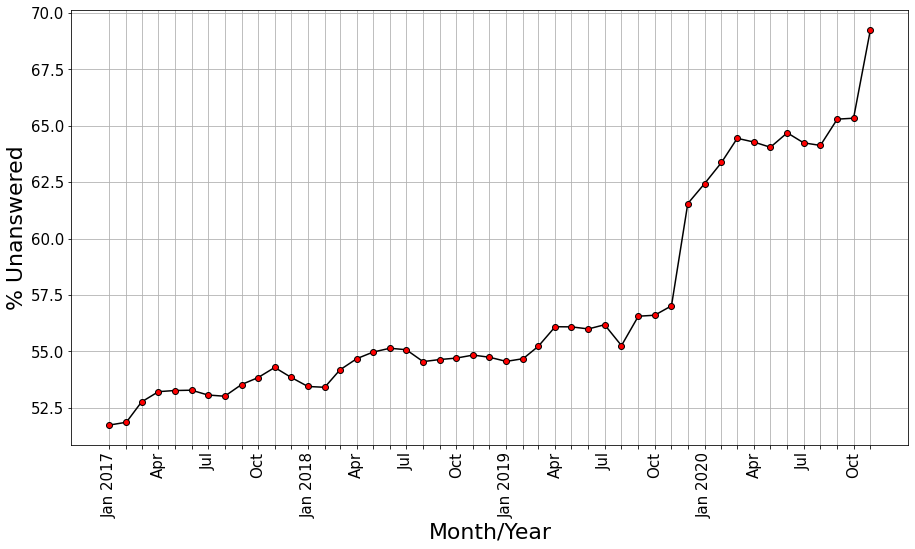

In [146]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_percent['CreateYearMonth'],ques_ans_percent['PercentUnanswered'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_percent['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('% Unanswered',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_NoAnswertMonthlyPlot.pdf',bbox_inches='tight')

# ques_ans_percent.plot(x='CreateYearMonth',y='PercentUnanswered',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('% Unanswered')

# Avg Response Time

In [147]:
ques_ans=pd.merge(ques_with_ans,data_a,how='inner', left_on= ['RowId'],right_on= ['ParentId'])

In [148]:
ques_ans.head()

,RowId_x,CreateDate_x,Score_x,ViewCount_x,LastEditDate_x,LastActivityDate_x,AnswerCount_x,CommentCount_x,FavoritCount_x,AcceptedAnswerId,...,LastEditDate_y,LastActivityDate_y,AnswerCount_y,CommentCount_y,FavoritCount_y,ParentId,day_date_y,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,...,2017-01-01T01:11:04.750,2017-01-01T01:11:04.750,0,0,0,41412456,2017-01-01,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,...,2017-01-01T00:51:06.773,2017-01-01T00:51:06.773,0,4,0,41412463,2017-01-01,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,...,2017-01-01T01:03:25.117,2017-01-01T01:03:25.117,0,1,0,41412468,2017-01-01,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,1,2416,2017-01-01T07:14:01.367,2017-01-01T07:14:01.367,3,4,0,41412570,...,2017-01-01T00:10:09.057,2017-01-01T00:10:09.057,0,7,0,41412475,2017-01-01,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,1,2416,2017-01-01T07:14:01.367,2017-01-01T07:14:01.367,3,4,0,41412570,...,2017-01-01T00:32:54.857,2017-01-01T00:32:54.857,0,4,0,41412475,2017-01-01,2017,1,2017-01-01


In [149]:
print(ques_ans.isnull().sum(axis = 0))

RowId_x               0
CreateDate_x          0
Score_x               0
ViewCount_x           0
LastEditDate_x        0
LastActivityDate_x    0
AnswerCount_x         0
CommentCount_x        0
FavoritCount_x        0
AcceptedAnswerId      0
day_date_x            0
CreateYear_x          0
CreateMonth_x         0
CreateYearMonth_x     0
RowId_y               0
CreateDate_y          0
Score_y               0
ViewCount_y           0
LastEditDate_y        0
LastActivityDate_y    0
AnswerCount_y         0
CommentCount_y        0
FavoritCount_y        0
ParentId              0
day_date_y            0
CreateYear_y          0
CreateMonth_y         0
CreateYearMonth_y     0
dtype: int64


In [150]:
#drop the 770 rows that have null values for answers (possibly cause of data incompleteness)
# ques_ans.dropna()

In [151]:
ques_ans=ques_ans.drop(columns=["Score_x","ViewCount_x","LastEditDate_x","LastActivityDate_x","AnswerCount_x",
                                "CommentCount_x","FavoritCount_x"])
ques_ans.head()

# ques_ans.drop("ViewCount_y")
# ques_ans.drop("LastEditDate_y")
# ques_ans.drop("LastActivityDate_y")

,RowId_x,CreateDate_x,AcceptedAnswerId,day_date_x,CreateYear_x,CreateMonth_x,CreateYearMonth_x,RowId_y,CreateDate_y,Score_y,...,LastEditDate_y,LastActivityDate_y,AnswerCount_y,CommentCount_y,FavoritCount_y,ParentId,day_date_y,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,41412707,2017-01-01,2017,1,2017-01-01,41412707,2017-01-01 01:11:04.750,0,...,2017-01-01T01:11:04.750,2017-01-01T01:11:04.750,0,0,0,41412456,2017-01-01,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,41412502,2017-01-01,2017,1,2017-01-01,41412502,2017-01-01 00:14:28.760,4,...,2017-01-01T00:51:06.773,2017-01-01T00:51:06.773,0,4,0,41412463,2017-01-01,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,41412618,2017-01-01,2017,1,2017-01-01,41412618,2017-01-01 00:46:10.450,1,...,2017-01-01T01:03:25.117,2017-01-01T01:03:25.117,0,1,0,41412468,2017-01-01,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412484,2017-01-01 00:07:49.803,2,...,2017-01-01T00:10:09.057,2017-01-01T00:10:09.057,0,7,0,41412475,2017-01-01,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412570,2017-01-01 00:32:54.857,5,...,2017-01-01T00:32:54.857,2017-01-01T00:32:54.857,0,4,0,41412475,2017-01-01,2017,1,2017-01-01


In [152]:
ques_ans=ques_ans.drop(columns=["Score_y","ViewCount_y","LastEditDate_y","LastActivityDate_y","AnswerCount_y",
                                "CommentCount_y","FavoritCount_y"])
ques_ans.head()

,RowId_x,CreateDate_x,AcceptedAnswerId,day_date_x,CreateYear_x,CreateMonth_x,CreateYearMonth_x,RowId_y,CreateDate_y,ParentId,day_date_y,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,41412707,2017-01-01,2017,1,2017-01-01,41412707,2017-01-01 01:11:04.750,41412456,2017-01-01,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,41412502,2017-01-01,2017,1,2017-01-01,41412502,2017-01-01 00:14:28.760,41412463,2017-01-01,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,41412618,2017-01-01,2017,1,2017-01-01,41412618,2017-01-01 00:46:10.450,41412468,2017-01-01,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412484,2017-01-01 00:07:49.803,41412475,2017-01-01,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412570,2017-01-01 00:32:54.857,41412475,2017-01-01,2017,1,2017-01-01


In [153]:
ques_ans = ques_ans.rename(columns={'CreateDate_x': 'CreateDateQues', 'CreateDate_y': 'CreateDateAns',
                                    'RowId_x':'QuestionId','RowId_y':'AnswerId'})

In [154]:
ques_ans.head()

,QuestionId,CreateDateQues,AcceptedAnswerId,day_date_x,CreateYear_x,CreateMonth_x,CreateYearMonth_x,AnswerId,CreateDateAns,ParentId,day_date_y,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,41412707,2017-01-01,2017,1,2017-01-01,41412707,2017-01-01 01:11:04.750,41412456,2017-01-01,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,41412502,2017-01-01,2017,1,2017-01-01,41412502,2017-01-01 00:14:28.760,41412463,2017-01-01,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,41412618,2017-01-01,2017,1,2017-01-01,41412618,2017-01-01 00:46:10.450,41412468,2017-01-01,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412484,2017-01-01 00:07:49.803,41412475,2017-01-01,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412570,2017-01-01 00:32:54.857,41412475,2017-01-01,2017,1,2017-01-01


In [155]:
ques_ans['CreateDateQues'] = pd.to_datetime(ques_ans['CreateDateQues'])
ques_ans['CreateDateAns'] = pd.to_datetime(ques_ans['CreateDateAns'])
ques_ans.head()

,QuestionId,CreateDateQues,AcceptedAnswerId,day_date_x,CreateYear_x,CreateMonth_x,CreateYearMonth_x,AnswerId,CreateDateAns,ParentId,day_date_y,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,41412707,2017-01-01,2017,1,2017-01-01,41412707,2017-01-01 01:11:04.750,41412456,2017-01-01,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,41412502,2017-01-01,2017,1,2017-01-01,41412502,2017-01-01 00:14:28.760,41412463,2017-01-01,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,41412618,2017-01-01,2017,1,2017-01-01,41412618,2017-01-01 00:46:10.450,41412468,2017-01-01,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412484,2017-01-01 00:07:49.803,41412475,2017-01-01,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412570,2017-01-01 00:32:54.857,41412475,2017-01-01,2017,1,2017-01-01


In [156]:
ques_ans['ResponseTime']=(ques_ans['CreateDateAns']-ques_ans['CreateDateQues'])
ques_ans.head()

,QuestionId,CreateDateQues,AcceptedAnswerId,day_date_x,CreateYear_x,CreateMonth_x,CreateYearMonth_x,AnswerId,CreateDateAns,ParentId,day_date_y,CreateYear_y,CreateMonth_y,CreateYearMonth_y,ResponseTime
0,41412456,2017-01-01 00:00:39.710,41412707,2017-01-01,2017,1,2017-01-01,41412707,2017-01-01 01:11:04.750,41412456,2017-01-01,2017,1,2017-01-01,0 days 01:10:25.040000
1,41412463,2017-01-01 00:02:29.813,41412502,2017-01-01,2017,1,2017-01-01,41412502,2017-01-01 00:14:28.760,41412463,2017-01-01,2017,1,2017-01-01,0 days 00:11:58.947000
2,41412468,2017-01-01 00:03:39.970,41412618,2017-01-01,2017,1,2017-01-01,41412618,2017-01-01 00:46:10.450,41412468,2017-01-01,2017,1,2017-01-01,0 days 00:42:30.480000
3,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412484,2017-01-01 00:07:49.803,41412475,2017-01-01,2017,1,2017-01-01,0 days 00:02:42.053000
4,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412570,2017-01-01 00:32:54.857,41412475,2017-01-01,2017,1,2017-01-01,0 days 00:27:47.107000


In [157]:
ques_ans['ResponseTimeSec']=ques_ans['ResponseTime'].dt.total_seconds()
ques_ans.head()

,QuestionId,CreateDateQues,AcceptedAnswerId,day_date_x,CreateYear_x,CreateMonth_x,CreateYearMonth_x,AnswerId,CreateDateAns,ParentId,day_date_y,CreateYear_y,CreateMonth_y,CreateYearMonth_y,ResponseTime,ResponseTimeSec
0,41412456,2017-01-01 00:00:39.710,41412707,2017-01-01,2017,1,2017-01-01,41412707,2017-01-01 01:11:04.750,41412456,2017-01-01,2017,1,2017-01-01,0 days 01:10:25.040000,4225.040
1,41412463,2017-01-01 00:02:29.813,41412502,2017-01-01,2017,1,2017-01-01,41412502,2017-01-01 00:14:28.760,41412463,2017-01-01,2017,1,2017-01-01,0 days 00:11:58.947000,718.947
2,41412468,2017-01-01 00:03:39.970,41412618,2017-01-01,2017,1,2017-01-01,41412618,2017-01-01 00:46:10.450,41412468,2017-01-01,2017,1,2017-01-01,0 days 00:42:30.480000,2550.480
3,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412484,2017-01-01 00:07:49.803,41412475,2017-01-01,2017,1,2017-01-01,0 days 00:02:42.053000,162.053
4,41412475,2017-01-01 00:05:07.750,41412570,2017-01-01,2017,1,2017-01-01,41412570,2017-01-01 00:32:54.857,41412475,2017-01-01,2017,1,2017-01-01,0 days 00:27:47.107000,1667.107


In [158]:
print(len(ques_ans[ques_ans['ResponseTimeSec']<0]))
print(len(ques_ans))

17
5198907


In [159]:
ques_ans=ques_ans[ques_ans['ResponseTimeSec']>=0]

In [160]:
print(len(ques_ans[ques_ans['ResponseTimeSec']<0]))
print(len(ques_ans))

0
5198890


In [161]:
ques_ans_grp=ques_ans.groupby(['QuestionId','CreateDateQues'])['ResponseTimeSec'].min().reset_index()
ques_ans_grp.head()

,QuestionId,CreateDateQues,ResponseTimeSec
0,41412456,2017-01-01 00:00:39.710,4225.040
1,41412463,2017-01-01 00:02:29.813,718.947
2,41412468,2017-01-01 00:03:39.970,2550.480
3,41412475,2017-01-01 00:05:07.750,162.053
4,41412480,2017-01-01 00:06:43.183,142005.630


In [162]:
print(len(ques_ans))
print(len(ques_ans_grp))

5198890
3395795


In [163]:
ques_ans_grp["CreateDateQues"] = pd.to_datetime(ques_ans_grp["CreateDateQues"])
#     print(data.head())
ques_ans_grp["CreateYear"]=ques_ans_grp['CreateDateQues'].map(lambda x: x.year)
#     print(data.head())
ques_ans_grp["CreateMonth"]=ques_ans_grp['CreateDateQues'].map(lambda x: x.month)
#     print(data.head())
ques_ans_grp["CreateYearMonth"]=ques_ans_grp["CreateYear"].astype(str) +"-"+ ques_ans_grp["CreateMonth"].astype(str)
#     print(data.head())
ques_ans_grp['CreateYearMonth'] = pd.to_datetime(ques_ans_grp['CreateYearMonth'])
print(ques_ans_grp.head())

  QuestionId          CreateDateQues  ResponseTimeSec  CreateYear  \
0   41412456 2017-01-01 00:00:39.710         4225.040        2017   
1   41412463 2017-01-01 00:02:29.813          718.947        2017   
2   41412468 2017-01-01 00:03:39.970         2550.480        2017   
3   41412475 2017-01-01 00:05:07.750          162.053        2017   
4   41412480 2017-01-01 00:06:43.183       142005.630        2017   

   CreateMonth CreateYearMonth  
0            1      2017-01-01  
1            1      2017-01-01  
2            1      2017-01-01  
3            1      2017-01-01  
4            1      2017-01-01  


In [164]:
ques_ans_grp["ResponseTimeMin"]=ques_ans_grp['ResponseTimeSec']/60.0
ques_ans_grp["ResponseTimeHr"]=ques_ans_grp['ResponseTimeMin']/60.0
ques_ans_grp.head()

,QuestionId,CreateDateQues,ResponseTimeSec,CreateYear,CreateMonth,CreateYearMonth,ResponseTimeMin,ResponseTimeHr
0,41412456,2017-01-01 00:00:39.710,4225.040,2017,1,2017-01-01,70.417333,1.173622
1,41412463,2017-01-01 00:02:29.813,718.947,2017,1,2017-01-01,11.982450,0.199708
2,41412468,2017-01-01 00:03:39.970,2550.480,2017,1,2017-01-01,42.508000,0.708467
3,41412475,2017-01-01 00:05:07.750,162.053,2017,1,2017-01-01,2.700883,0.045015
4,41412480,2017-01-01 00:06:43.183,142005.630,2017,1,2017-01-01,2366.760500,39.446008


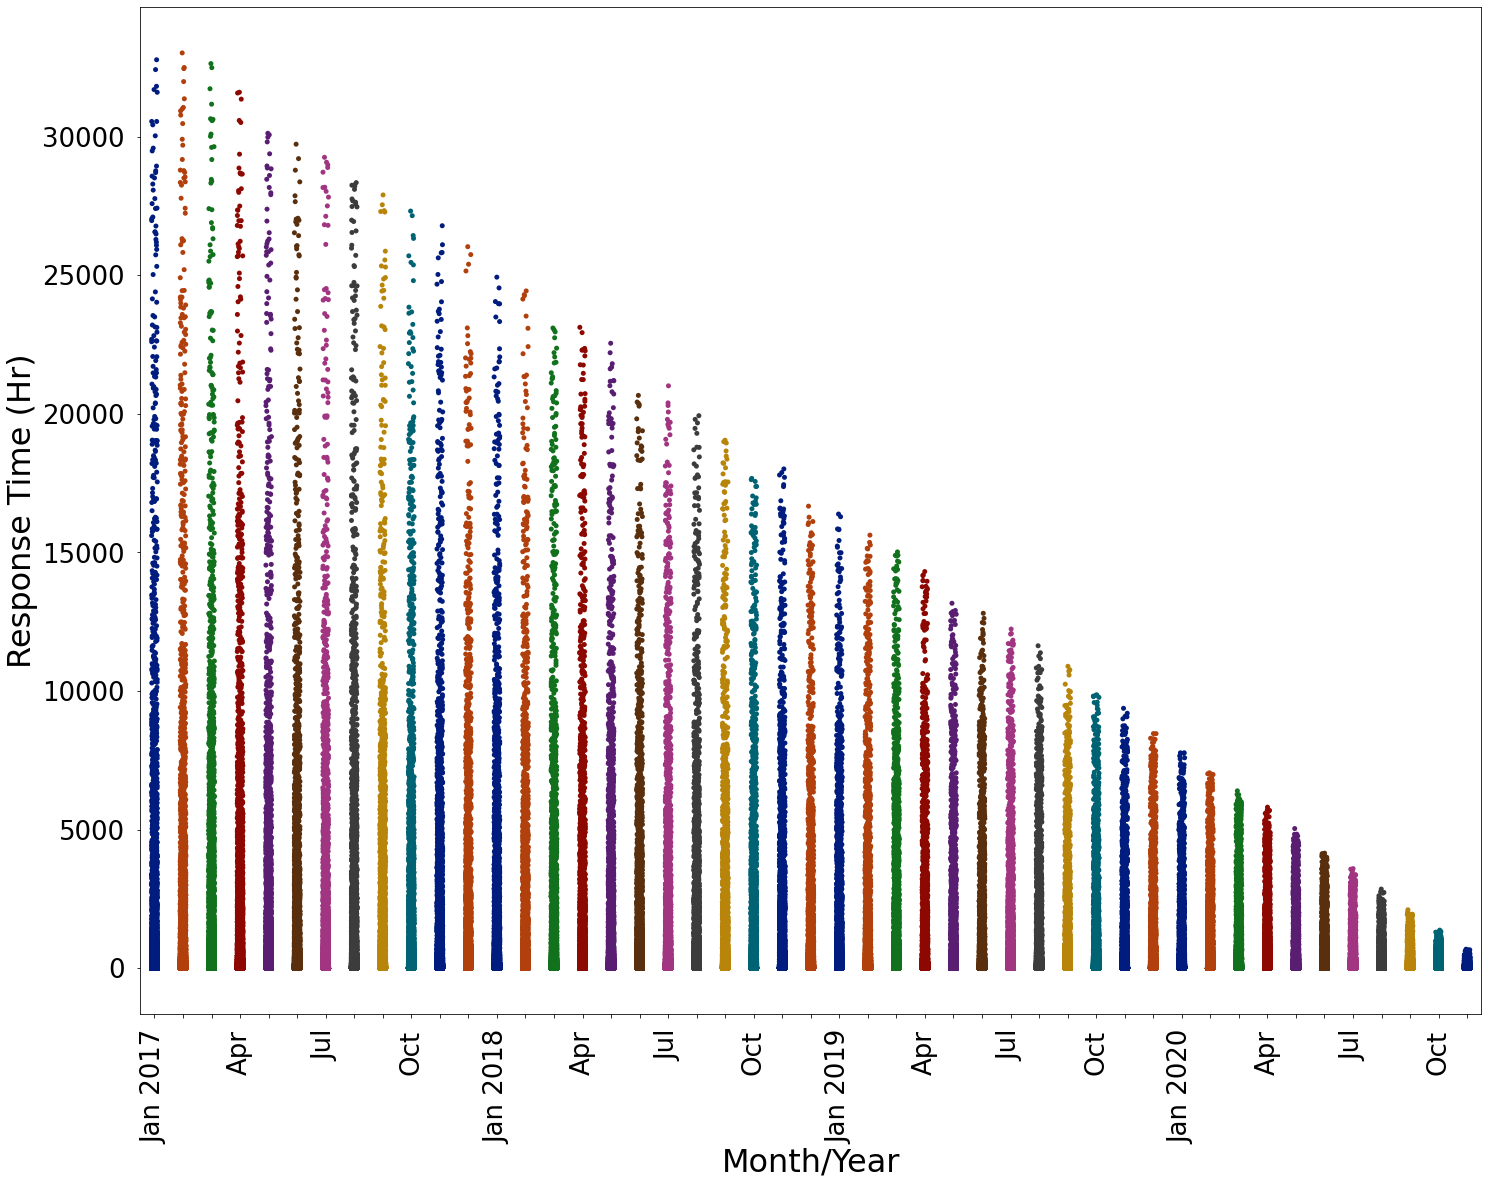

In [165]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.tick_params(axis ='both', which ='major',  
               labelsize = 26, pad = 12,  ) 
plt.tight_layout()
myplot=sb.stripplot(x=ques_ans_grp['CreateYearMonth'], y=ques_ans_grp['ResponseTimeHr'],palette=sb.color_palette("dark", n_colors=12))
ax.set_xticklabels(months_xticks, minor=False)

# plt.xticks(fontsize=15,rotation=90)
# plt.yticks(fontsize=15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.ylabel('Response Time (Hr)',fontsize=32)
# plt.grid()
plt.xlabel('Month/Year',fontsize=32)
plt.show()
fig = myplot.get_figure()
# fig.savefig(...)
fig.savefig('figs/SO_ResponseTime.png',bbox_inches='tight')


In [166]:
ques_ans_grp_2019_2020=ques_ans_grp[(ques_ans_grp["CreateYear"]==2019) | (ques_ans_grp["CreateYear"]==2020) ]
len(ques_ans_grp_2019_2020)
ques_ans_grp_2020=ques_ans_grp[ques_ans_grp["CreateYear"]==2020]
len(ques_ans_grp_2020)

746237

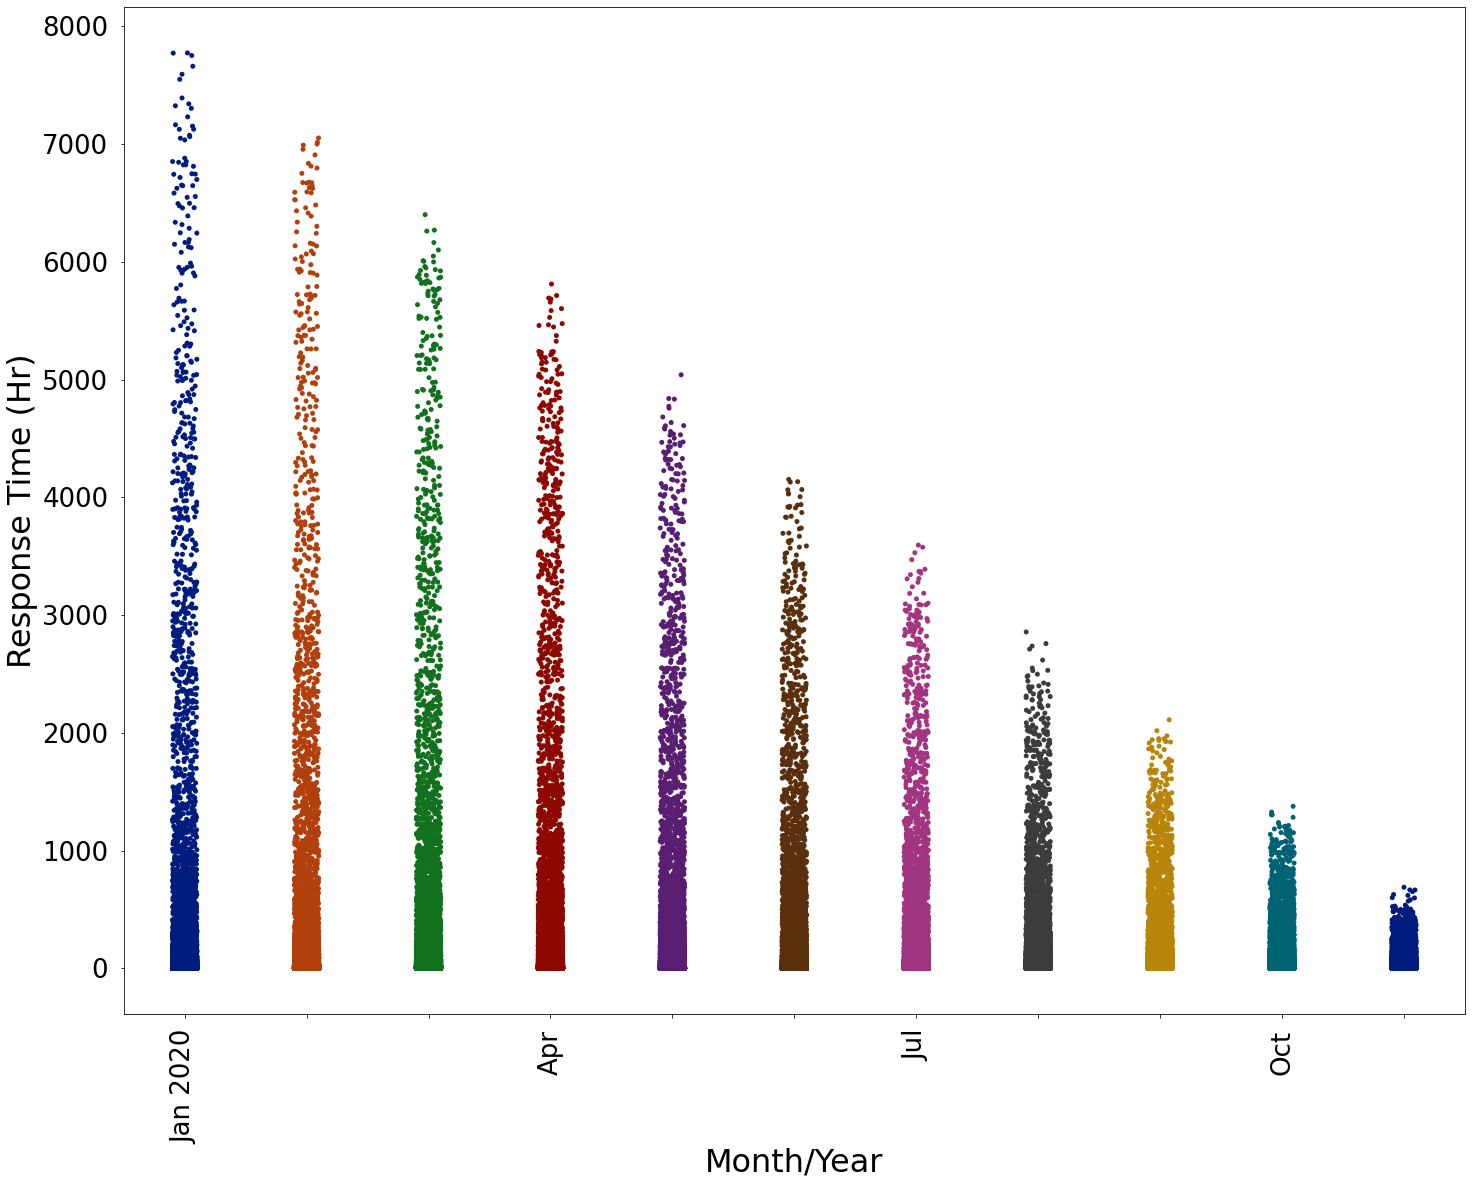

In [167]:
months_xticks_2020=['Jan 2020','','','Apr','','','Jul','','','Oct','']
fig, ax = plt.subplots(figsize=(20, 15))
ax.tick_params(axis ='both', which ='major',  
               labelsize = 26, pad = 12,  ) 
plt.tight_layout()
myplot=sb.stripplot(x=ques_ans_grp_2020['CreateYearMonth'], y=ques_ans_grp_2020['ResponseTimeHr'],
             palette=sb.color_palette("dark", n_colors=12))
ax.set_xticklabels(months_xticks_2020, minor=False)

# plt.xticks(fontsize=15,rotation=90)
# plt.yticks(fontsize=15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.ylabel('Response Time (Hr)',fontsize=32)
# plt.grid()
plt.xlabel('Month/Year',fontsize=32)
plt.show()
fig = myplot.get_figure()
fig.savefig('figs/SO_ResponseTime2020.png',bbox_inches='tight')

In [168]:
ques_ans_yearly_monthly = pd.DataFrame(ques_ans_grp[["QuestionId", "CreateYearMonth","ResponseTimeMin"]])
#     print(creation_yearly_monthly.head())
ques_ans_yearly_monthly_mean=ques_ans_yearly_monthly.groupby(['CreateYearMonth'])['ResponseTimeMin'].mean().reset_index()
# ques_ans_yearly_monthly_mean['ResponseTimeSec']=ques_ans_yearly_monthly_mean['ResponseTimeSec']/60 #to min
# ques_ans_yearly_monthly_mean['ResponseTimeSec']=ques_ans_yearly_monthly_mean['ResponseTimeSec']/60 #to hr
# ques_ans_yearly_monthly_mean=ques_ans_yearly_monthly_mean.rename(columns={"ResponseTimeSec":"ResponseTimeMin"})
ques_ans_yearly_monthly_mean['ResponseTimeMin']=ques_ans_yearly_monthly_mean['ResponseTimeMin'].astype(int)
ques_ans_yearly_monthly_mean.head()

,CreateYearMonth,ResponseTimeMin
0,2017-01-01,7548
1,2017-02-01,7456
2,2017-03-01,7370
3,2017-04-01,7354
4,2017-05-01,7013


In [169]:
ques_ans_yearly_monthly_median=ques_ans_yearly_monthly.groupby(['CreateYearMonth'])['ResponseTimeMin'].median().reset_index()
# ques_ans_yearly_monthly_median['ResponseTimeSec']=ques_ans_yearly_monthly_median['ResponseTimeSec']/60 #to min
# ques_ans_yearly_monthly_median['ResponseTimeSec']=ques_ans_yearly_monthly_median['ResponseTimeSec']/60 #to hr
# ques_ans_yearly_monthly_median=ques_ans_yearly_monthly_median.rename(columns={"ResponseTimeSec":"ResponseTimeMin"})
ques_ans_yearly_monthly_median['ResponseTimeMin']=ques_ans_yearly_monthly_median['ResponseTimeMin'].astype(int)
ques_ans_yearly_monthly_median.head()

,CreateYearMonth,ResponseTimeMin
0,2017-01-01,30
1,2017-02-01,29
2,2017-03-01,29
3,2017-04-01,30
4,2017-05-01,30


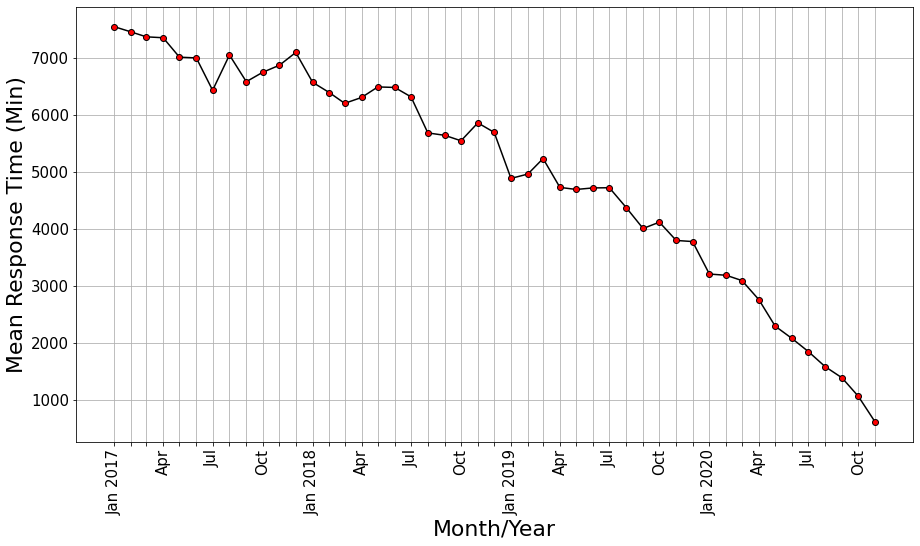

In [170]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_yearly_monthly_mean['CreateYearMonth'],ques_ans_yearly_monthly_mean['ResponseTimeMin'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_yearly_monthly_mean['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Mean Response Time (Min)',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_MeanResponseTime.pdf',bbox_inches='tight')

# ques_ans_yearly_monthly_mean.plot(x='CreateYearMonth',y='ResponseTimeHr',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Mean Response Time (Hr)')

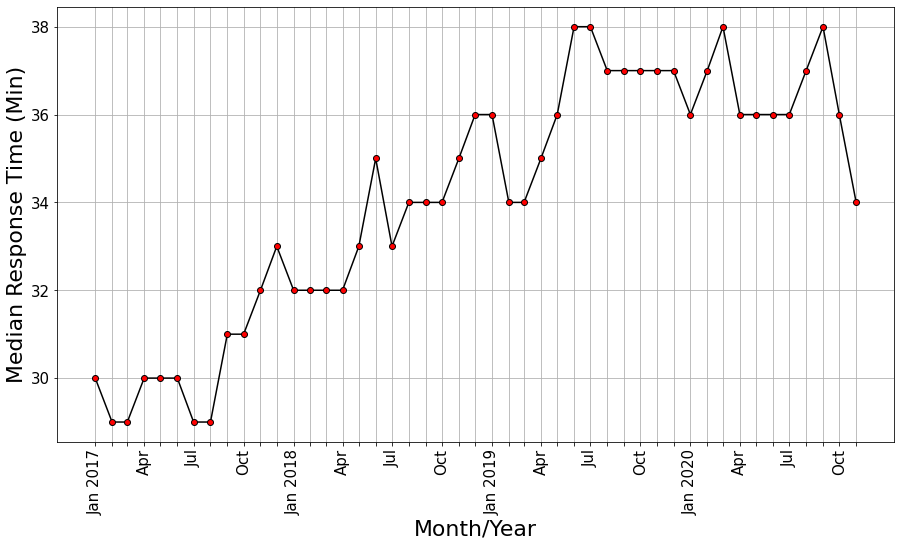

In [171]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_yearly_monthly_median['CreateYearMonth'],ques_ans_yearly_monthly_median['ResponseTimeMin'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_yearly_monthly_median['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Median Response Time (Min)',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_MedianResponseTime.pdf',bbox_inches='tight')

# ques_ans_yearly_monthly_median.plot(x='CreateYearMonth',y='ResponseTimeMin',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Median Response Time (Min)')

# Weekend vs Weekday

In [172]:
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,day_date,CreateYear,CreateMonth,CreateYearMonth
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017-01-01,2017,1,2017-01-01
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017-01-01,2017,1,2017-01-01
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017-01-01,2017,1,2017-01-01
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017-01-01,2017,1,2017-01-01
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017-01-01,2017,1,2017-01-01


In [173]:
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,day_date,CreateYear,CreateMonth,CreateYearMonth
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017-01-01,2017,1,2017-01-01
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017-01-01,2017,1,2017-01-01
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017-01-01,2017,1,2017-01-01
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017-01-01,2017,1,2017-01-01
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017-01-01,2017,1,2017-01-01


In [174]:
#Return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6
data_q["IsWeekend"]=np.where(((data_q["CreateDate"]).dt.dayofweek) < 5,0,1) #pd.DatetimeIndex(data_q["CreateDate"]).dayofweek
data_a["IsWeekend"]=np.where(((data_a["CreateDate"]).dt.dayofweek) < 5,0,1) #pd.DatetimeIndex(data_q["CreateDate"]).dayofweek

In [175]:
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,day_date,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017-01-01,2017,1,2017-01-01,1
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017-01-01,2017,1,2017-01-01,1
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017-01-01,2017,1,2017-01-01,1
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017-01-01,2017,1,2017-01-01,1
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017-01-01,2017,1,2017-01-01,1


In [176]:
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,day_date,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017-01-01,2017,1,2017-01-01,1
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017-01-01,2017,1,2017-01-01,1
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017-01-01,2017,1,2017-01-01,1
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017-01-01,2017,1,2017-01-01,1
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017-01-01,2017,1,2017-01-01,1


In [177]:
data_q["CreateDate"] = pd.to_datetime(data_q["CreateDate"])
data_q["CreateYear"]=data_q['CreateDate'].map(lambda x: x.year)
data_q["CreateMonth"]=data_q['CreateDate'].map(lambda x: x.month)
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,day_date,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017-01-01,2017,1,2017-01-01,1
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017-01-01,2017,1,2017-01-01,1
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017-01-01,2017,1,2017-01-01,1
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017-01-01,2017,1,2017-01-01,1
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017-01-01,2017,1,2017-01-01,1


In [178]:
data_a["CreateDate"] = pd.to_datetime(data_a["CreateDate"])
data_a["CreateYear"]=data_a['CreateDate'].map(lambda x: x.year)
data_a["CreateMonth"]=data_a['CreateDate'].map(lambda x: x.month)
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,day_date,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017-01-01,2017,1,2017-01-01,1
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017-01-01,2017,1,2017-01-01,1
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017-01-01,2017,1,2017-01-01,1
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017-01-01,2017,1,2017-01-01,1
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017-01-01,2017,1,2017-01-01,1


In [179]:
data_q['CreateYearMonth'] = pd.to_datetime(data_q['CreateYearMonth'])
ques_creation_yearly_monthly_weekend = pd.DataFrame(data_q[["RowId", "CreateYearMonth","IsWeekend"]])
ques_creation_yearly_monthly_weekend.head()

,RowId,CreateYearMonth,IsWeekend
0,41412454,2017-01-01,1
1,41412456,2017-01-01,1
2,41412462,2017-01-01,1
3,41412463,2017-01-01,1
4,41412468,2017-01-01,1


In [180]:
data_a['CreateYearMonth'] = pd.to_datetime(data_a['CreateYearMonth'])
ans_creation_yearly_monthly_weekend = pd.DataFrame(data_a[["RowId", "CreateYearMonth","IsWeekend"]])
ans_creation_yearly_monthly_weekend.head()

,RowId,CreateYearMonth,IsWeekend
0,41412453,2017-01-01,1
1,41412455,2017-01-01,1
2,41412458,2017-01-01,1
3,41412459,2017-01-01,1
4,41412461,2017-01-01,1


In [181]:
ques_yearly_monthly_weekend_weekday_grp=ques_creation_yearly_monthly_weekend.groupby(by=['CreateYearMonth','IsWeekend']).size().reset_index(name='counts')
ques_yearly_monthly_weekend_weekday_grp.head()


,CreateYearMonth,IsWeekend,counts
0,2017-01-01,0,147189
1,2017-01-01,1,31515
2,2017-02-01,0,145825
3,2017-02-01,1,31248
4,2017-03-01,0,171356


In [182]:
ans_yearly_monthly_weekend_weekday_grp=ans_creation_yearly_monthly_weekend.groupby(by=['CreateYearMonth','IsWeekend']).size().reset_index(name='counts')
ans_yearly_monthly_weekend_weekday_grp.head()


,CreateYearMonth,IsWeekend,counts
0,2017-01-01,0,206715
1,2017-01-01,1,43250
2,2017-02-01,0,203206
3,2017-02-01,1,42907
4,2017-03-01,0,236378


In [183]:
ques_yearly_monthly_weekend_grp=ques_yearly_monthly_weekend_weekday_grp[(ques_yearly_monthly_weekend_weekday_grp["IsWeekend"]==1)]
ques_yearly_monthly_weekend_grp.head()
len(ques_yearly_monthly_weekend_grp)

47

In [184]:
ans_yearly_monthly_weekend_grp=ans_yearly_monthly_weekend_weekday_grp[(ans_yearly_monthly_weekend_weekday_grp["IsWeekend"]==1)]
ans_yearly_monthly_weekend_grp.head()
len(ans_yearly_monthly_weekend_grp)

47

In [185]:
ques_yearly_monthly_weekday_grp=ques_yearly_monthly_weekend_weekday_grp[(ques_yearly_monthly_weekend_weekday_grp["IsWeekend"]==0)]
ques_yearly_monthly_weekday_grp.head()
len(ques_yearly_monthly_weekday_grp)

47

In [186]:
ans_yearly_monthly_weekday_grp=ans_yearly_monthly_weekend_weekday_grp[(ans_yearly_monthly_weekend_weekday_grp["IsWeekend"]==0)]
ans_yearly_monthly_weekday_grp.head()
len(ans_yearly_monthly_weekday_grp)

47

Text(0, 0.5, 'Questions asked in workdays')

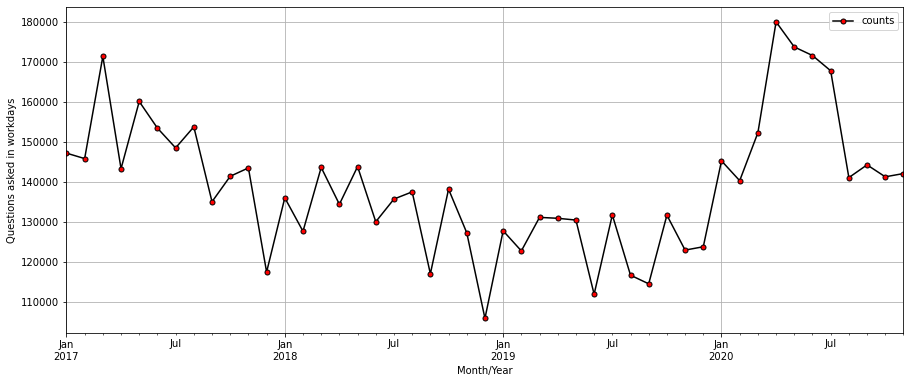

In [187]:
ques_yearly_monthly_weekday_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.grid()
plt.xlabel('Month/Year')
plt.ylabel('Questions asked in workdays')

Text(0, 0.5, 'Questions asked in weekends')

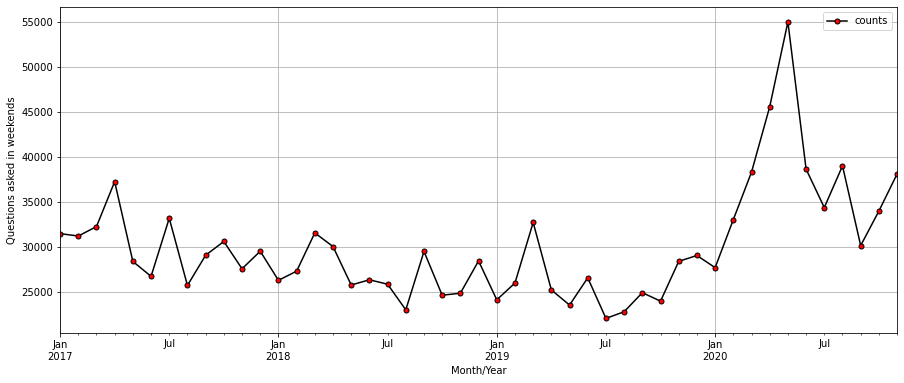

In [188]:
ques_yearly_monthly_weekend_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.grid()
plt.xlabel('Month/Year')
plt.ylabel('Questions asked in weekends')

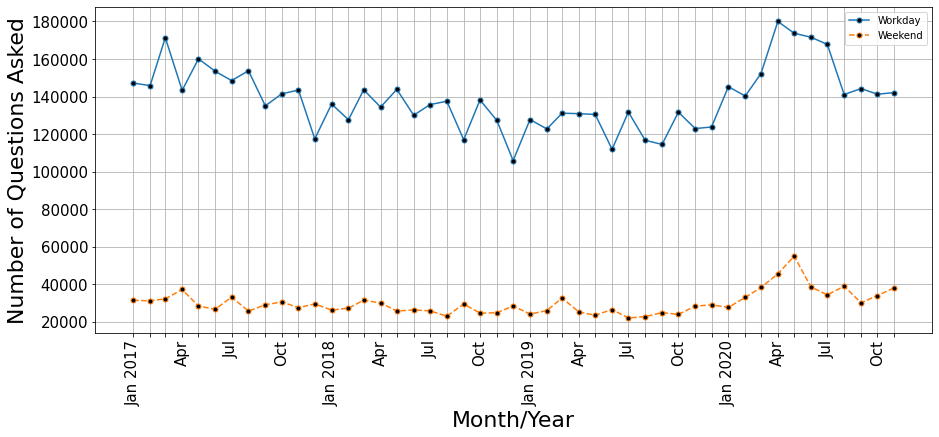

In [189]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in ques_yearly_monthly_weekend_weekday_grp.groupby('IsWeekend'):
    if(name==1):
        lbl="Weekend"
        plt.plot(group['CreateYearMonth'],group['counts'],linestyle='dashed',marker='.',markerfacecolor='black'
                 ,markersize=10,label=lbl)
    else:
        lbl="Workday"
        plt.plot(group['CreateYearMonth'],group['counts'],marker='.',markerfacecolor='black',markersize=10,label=lbl)
#     group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
plt.legend(loc='upper right')
plt.xticks(ques_yearly_monthly_weekend_grp['CreateYearMonth'], months_xticks,fontsize=15,rotation=90) #use ans_yearly_monthly_weekend_grp['CreateYearMonth'] since ans_yearly_monthly_weekend_weekday_grp has two values for each month (weekend and weekday)
plt.yticks(fontsize=15)
plt.ylabel('Number of Questions Asked',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_QuestionsWeekendWeekdayYearlyMonthly.pdf',bbox_inches='tight')


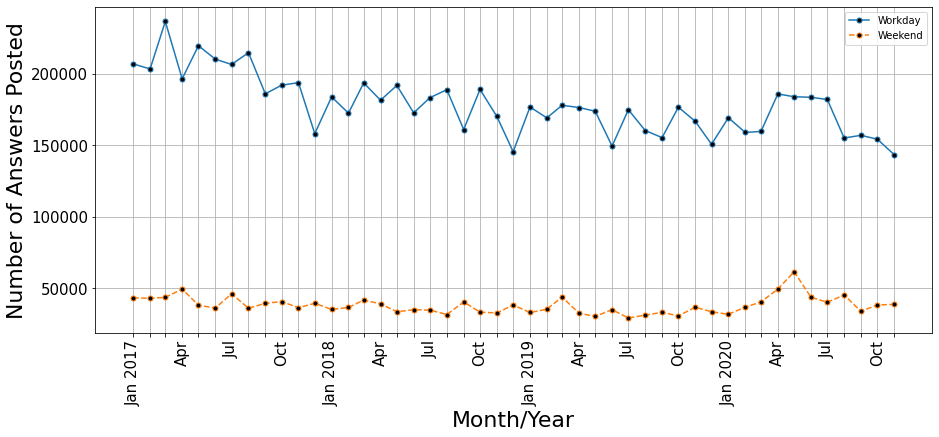

In [190]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in ans_yearly_monthly_weekend_weekday_grp.groupby('IsWeekend'):
    if(name==1):
        lbl="Weekend"
        plt.plot(group['CreateYearMonth'],group['counts'],linestyle='dashed',marker='.',markerfacecolor='black',
                 markersize=10,label=lbl)
#         group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
    else:
        lbl="Workday"
        plt.plot(group['CreateYearMonth'],group['counts'],marker='.',markerfacecolor='black',markersize=10,label=lbl)
#         group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
plt.legend(loc='upper right')
plt.xticks(ans_yearly_monthly_weekend_grp['CreateYearMonth'], months_xticks,fontsize=15,rotation=90) #use ans_yearly_monthly_weekend_grp['CreateYearMonth'] since ans_yearly_monthly_weekend_weekday_grp has two values for each month (weekend and weekday)
plt.yticks(fontsize=15)
plt.ylabel('Number of Answers Posted',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_AnswersWeekendWeekdayYearlyMonthly.pdf',bbox_inches='tight')

In [191]:
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,day_date,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017-01-01,2017,1,2017-01-01,1
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017-01-01,2017,1,2017-01-01,1
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017-01-01,2017,1,2017-01-01,1
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017-01-01,2017,1,2017-01-01,1
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017-01-01,2017,1,2017-01-01,1


In [192]:
len(data_q)

7945781

In [193]:
data_2017=data_q[data_q["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

2124351

In [194]:
data_2018=data_q[data_q["CreateYear"]==2018]
len(data_2018)

1901338

In [195]:
data_2019=data_q[data_q["CreateYear"]==2019]
len(data_2019)

1806283

In [196]:
data_2020=data_q[data_q["CreateYear"]==2020]
len(data_2020)

2113809

In [197]:
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,day_date,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017-01-01,2017,1,2017-01-01,1
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017-01-01,2017,1,2017-01-01,1
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017-01-01,2017,1,2017-01-01,1
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017-01-01,2017,1,2017-01-01,1
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017-01-01,2017,1,2017-01-01,1


In [198]:
len(data_a)

10177940

In [199]:
data_2017=data_a[data_a["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

2913396

In [200]:
data_2018=data_a[data_a["CreateYear"]==2018]
len(data_2018)

2563399

In [201]:
data_2019=data_a[data_a["CreateYear"]==2019]
len(data_2019)

2410316

In [202]:
data_2020=data_a[data_a["CreateYear"]==2020]
len(data_2020)

2290829